In [1]:
import numpy as np
from astropy.io import fits
import lime
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_1D_f99_c00.fits', mode='update')
header = hdul[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header['FLUXSCAL'] = 1
header

hdul.flush()

In [3]:
print(header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2234 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.00463867188 / RA at R

In [4]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [5]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file1 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_1D_f99_c00.fits"

#load the data
wave1, flux1, hdr1 = import_1313_fits(fits_file1)

In [6]:
# Galaxy redshift and the flux normalization
# la misma para todos los slits
z_obj = 0.001568
normFlux = 1

In [7]:
spec1 = lime.Spectrum(wave1, flux1, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

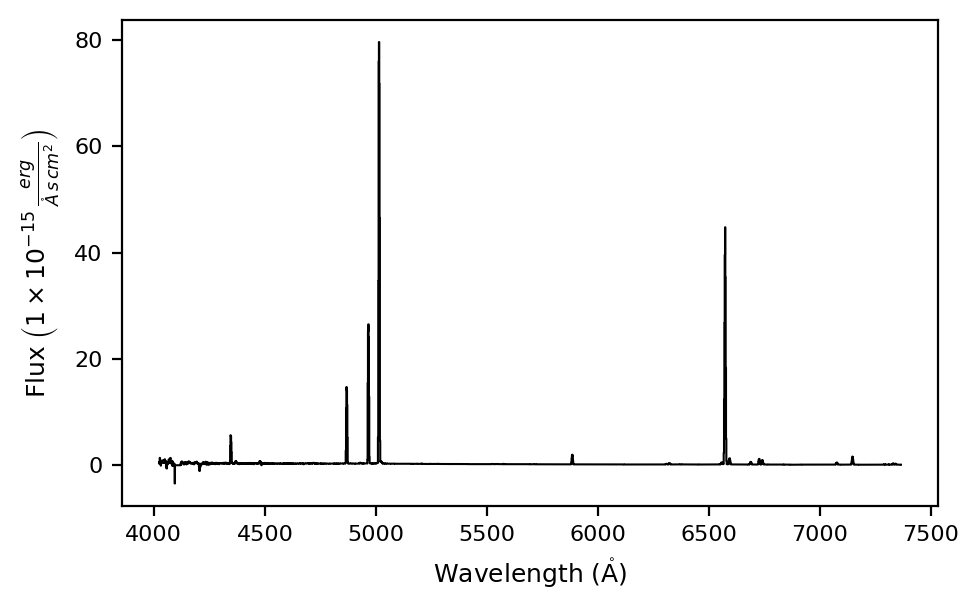

In [8]:
spec1.plot.spectrum(label='slit1_NGC1313')

In [9]:
# Line name, its location mask in the rest _frame and fit configuration
line1_Ha = 'H1_6563A_b'
band_edges1_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf1_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

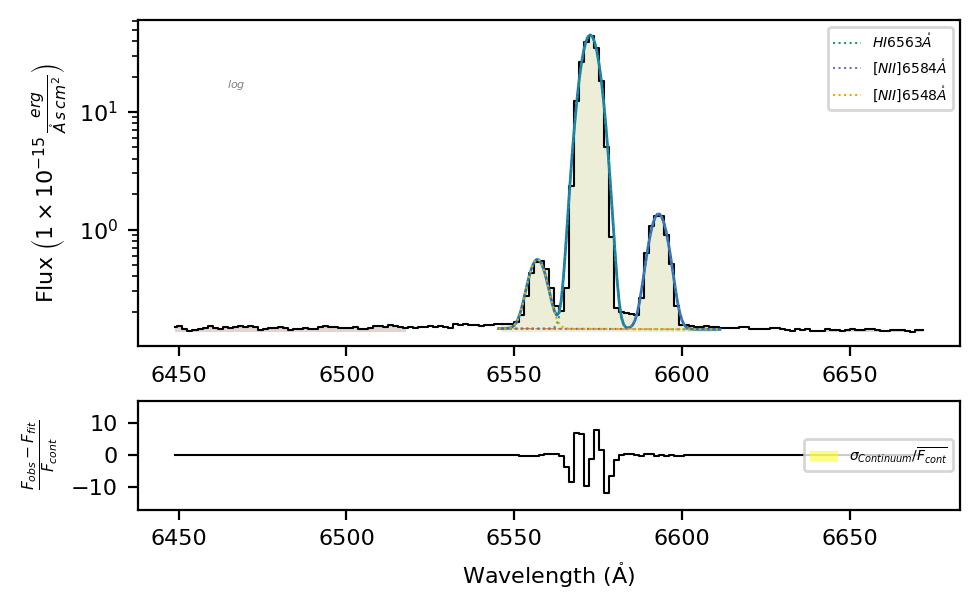

In [10]:
# New attempt including the fit configuration
spec1.fit.bands(line1_Ha, band_edges1_Ha, fit_conf=fit_conf1_Ha)
spec1.plot.bands()

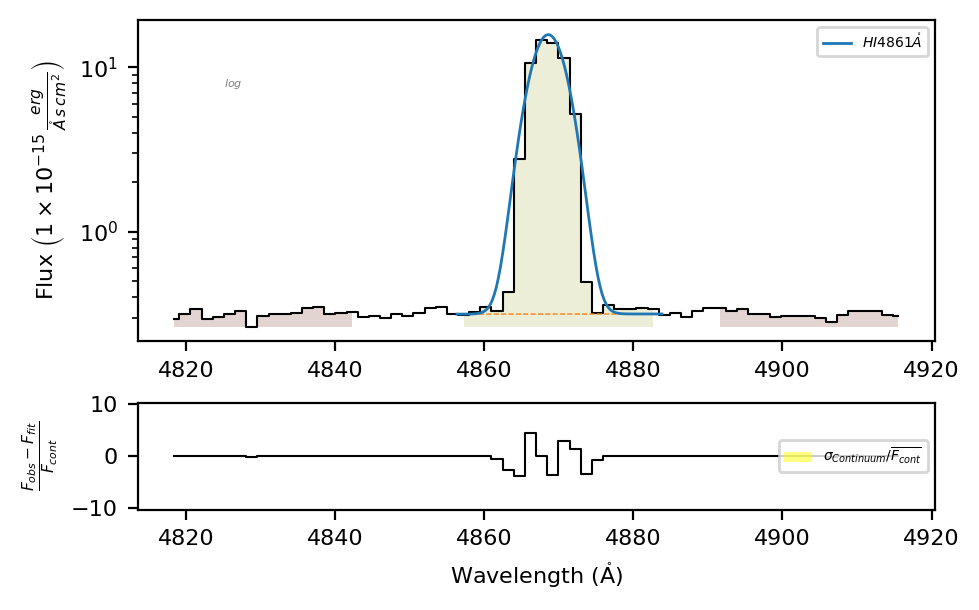

In [11]:
spec1.fit.bands('H1_4861A')
spec1.plot.bands()

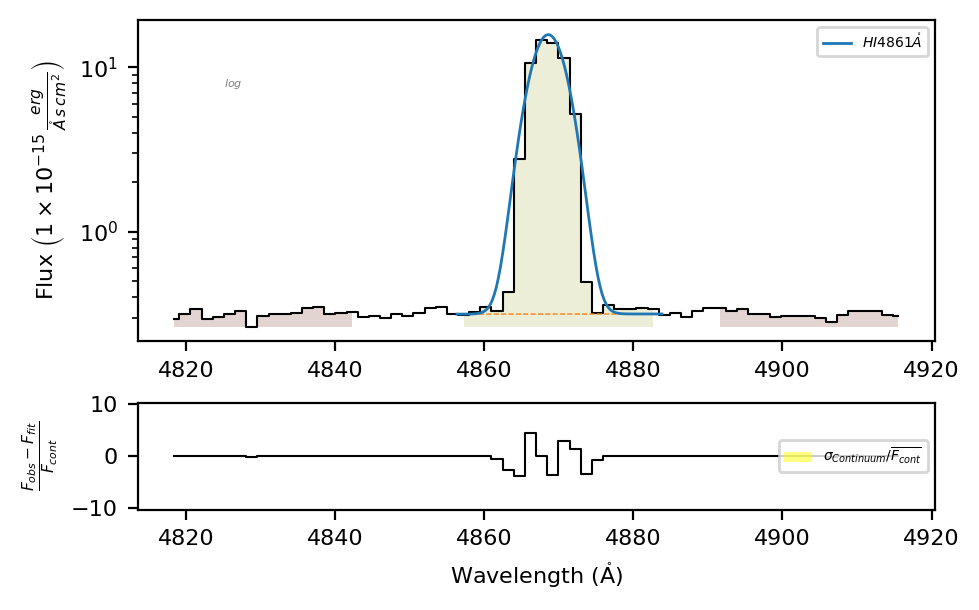

In [12]:
spec1.fit.bands(4861)
spec1.plot.bands()

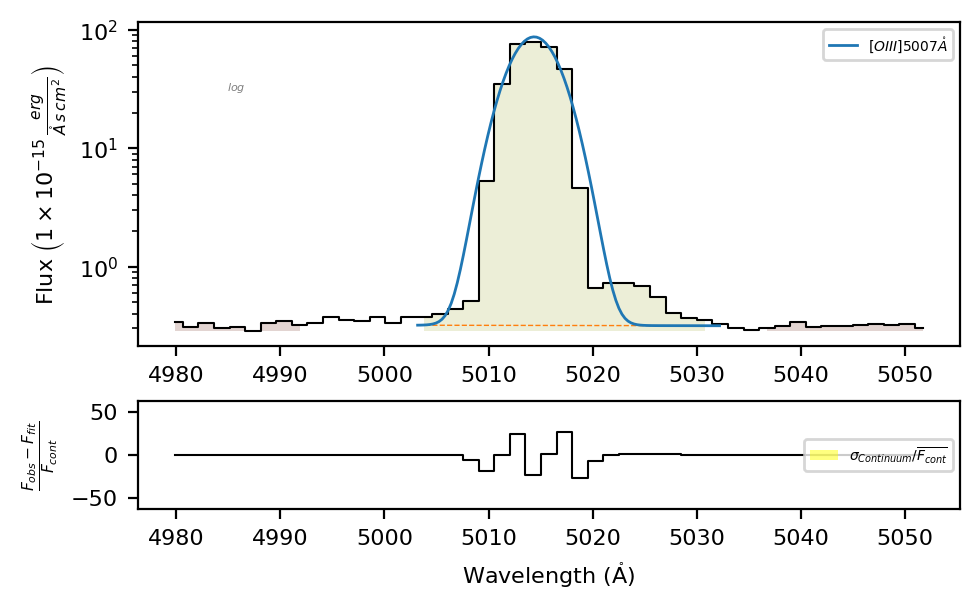

In [13]:
spec1.fit.bands('O3_5007A')
spec1.plot.bands()

In [14]:
#fit config for [OIII]
line1_O3 = 'O3_5007A_b'
fit_conf1_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.5'},
                'He1_5016A_amp':{'expr':'0.5'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

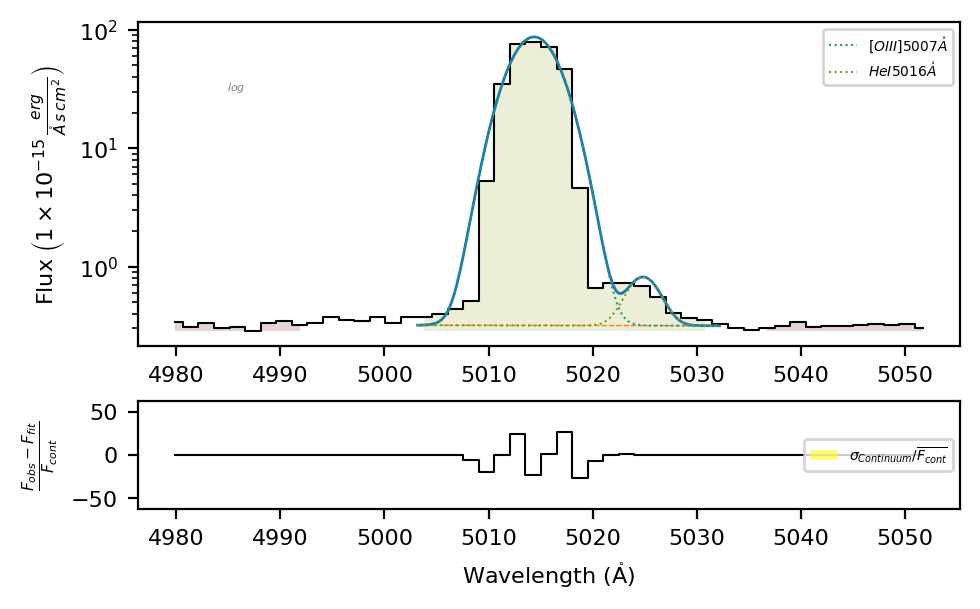

In [15]:
spec1.fit.bands(line1_O3, fit_conf=fit_conf1_O3)
spec1.plot.bands()

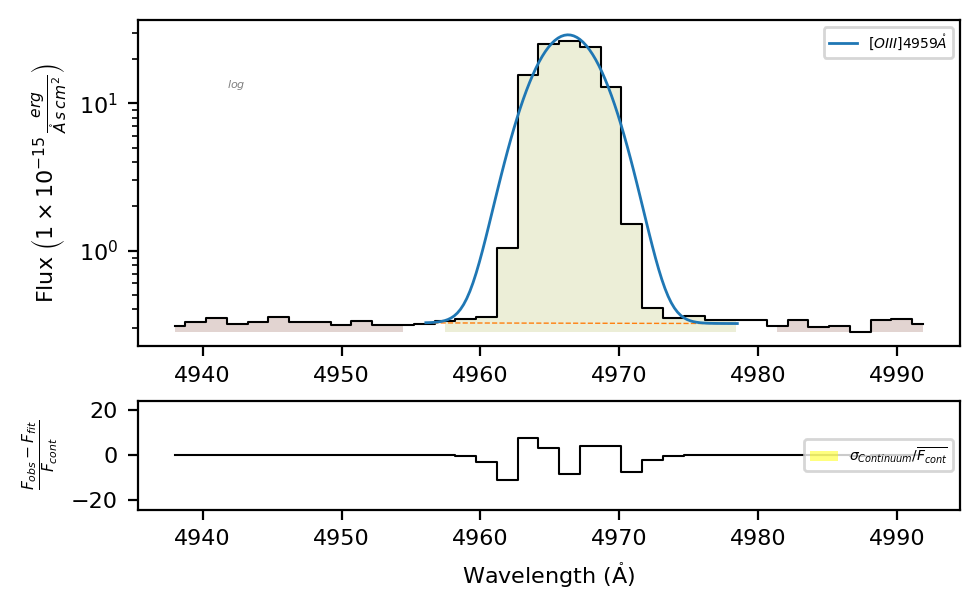

In [16]:
spec1.fit.bands(4959)
spec1.plot.bands()

In [17]:
# Line name, its location mask in the rest _frame and fit configuration
line1_S2 = 'S2_6716A_b'
band_edges1_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf1_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

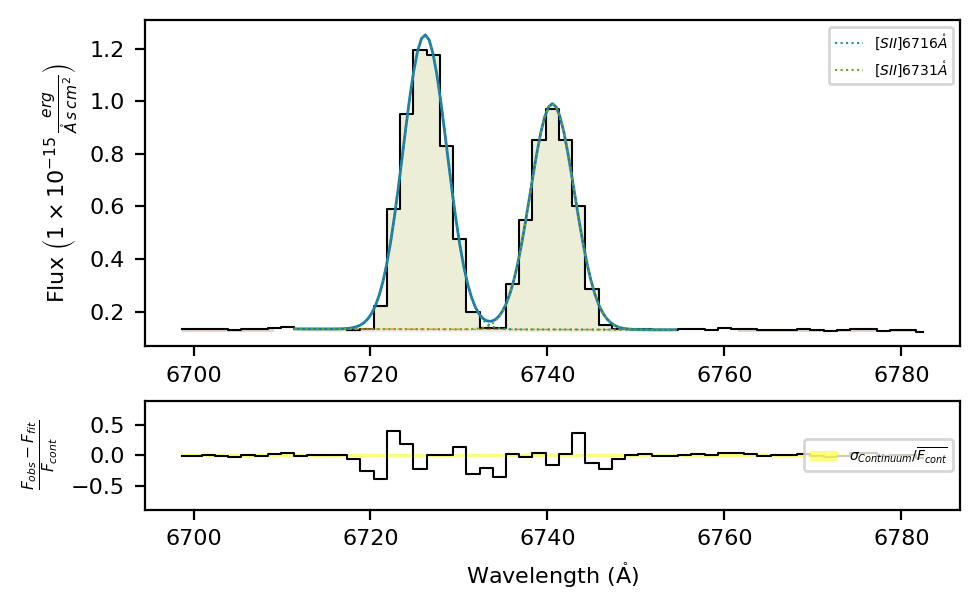

In [18]:
# New attempt including the fit configuration
spec1.fit.bands(line1_S2,band_edges1_S2, fit_conf=fit_conf1_S2)
spec1.plot.bands()

SLIT 3

In [19]:
hdul3 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_1D_f99_c00.fits', mode='update')
header3 = hdul3[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header3['FLUXSCAL'] = 1
header3
    
hdul3.flush()

In [20]:
print(header3)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2225 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.88818359375 / RA at R

In [21]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [22]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file3 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_1D_f99_c00.fits"

#load the data
wave3, flux3, hdr3 = import_1313_fits(fits_file3)

In [23]:
spec3 = lime.Spectrum(wave3, flux3, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

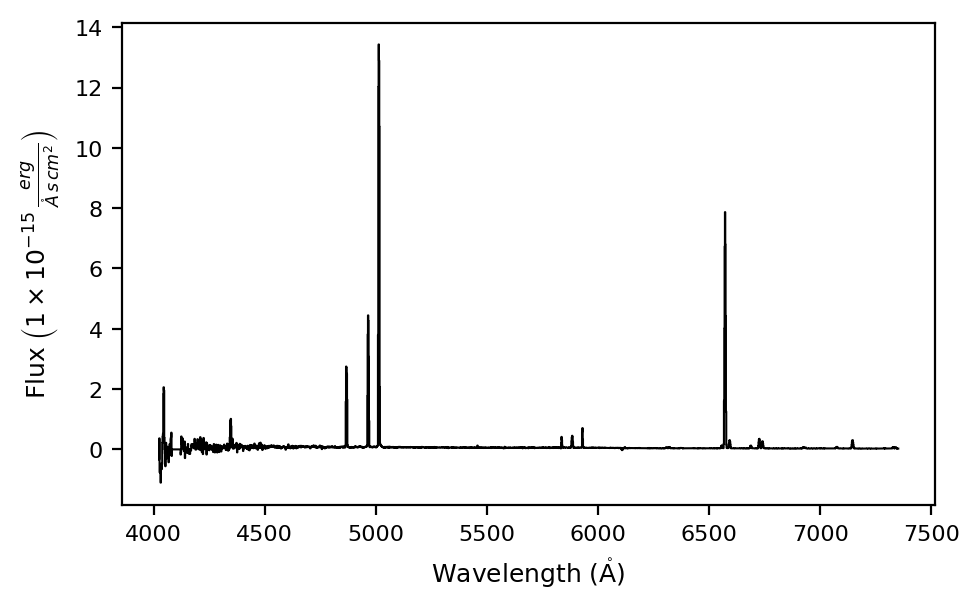

In [24]:
spec3.plot.spectrum(label='slit3_NGC1313')

In [25]:
# Line name, its location mask in the rest _frame and fit configuration
line3_Ha = 'H1_6563A_b'
band_edges3_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf3_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

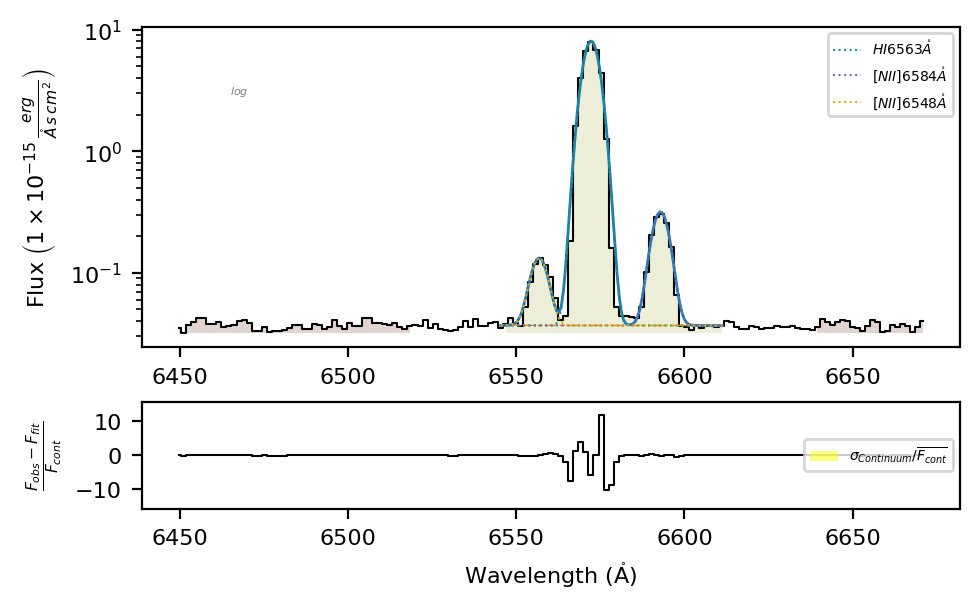

In [26]:
# New attempt including the fit configuration
spec3.fit.bands(line3_Ha, band_edges3_Ha, fit_conf=fit_conf3_Ha)
spec3.plot.bands()

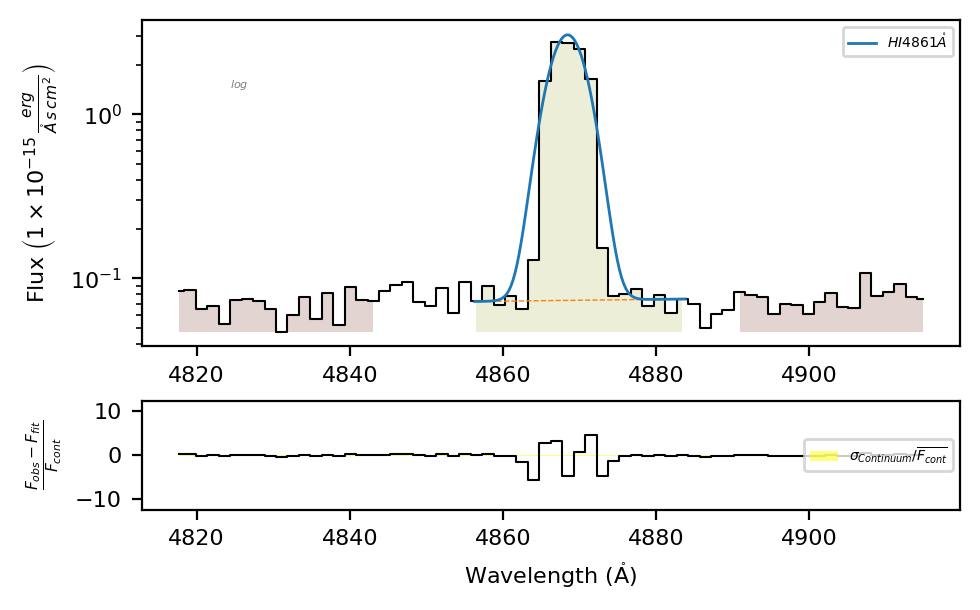

In [27]:
spec3.fit.bands(4861)
spec3.plot.bands()

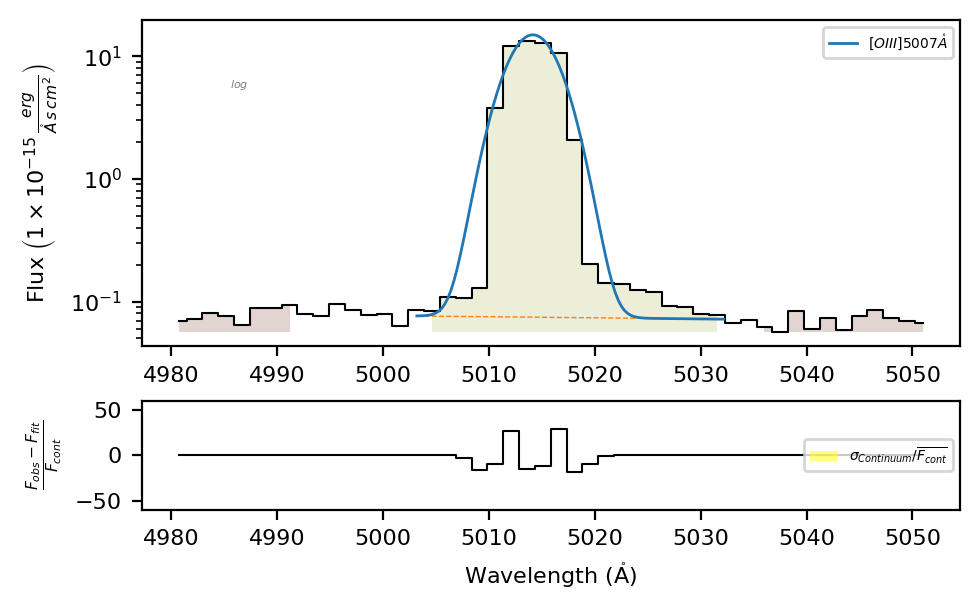

In [28]:
spec3.fit.bands('O3_5007A')
spec3.plot.bands()

In [29]:
#fit config for [OIII]
line3_O3 = 'O3_5007A_b'

fit_conf3_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.2'},
                'He1_5016A_amp':{'expr':'0.08'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

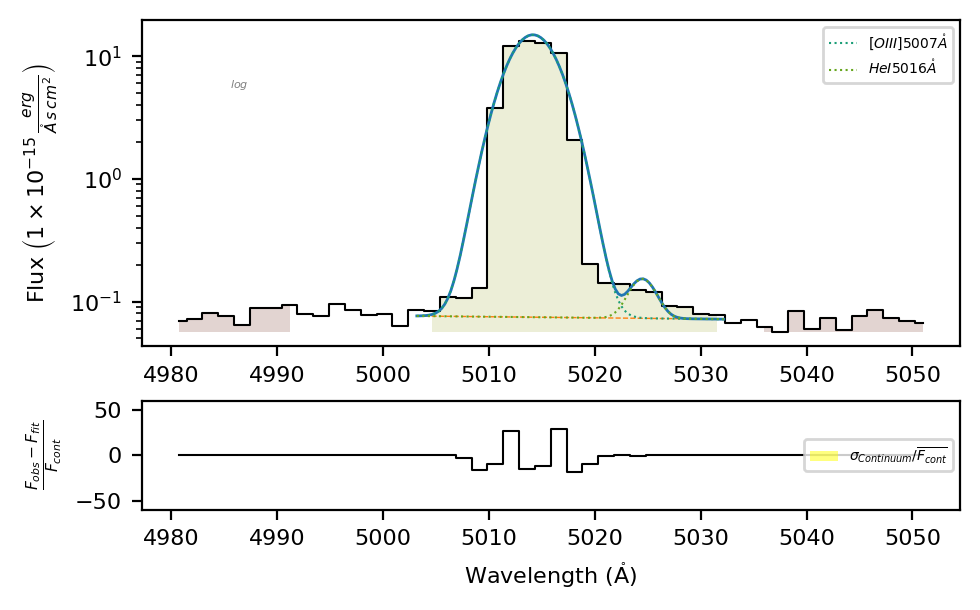

In [30]:
spec3.fit.bands(line3_O3, fit_conf=fit_conf3_O3)
spec3.plot.bands()

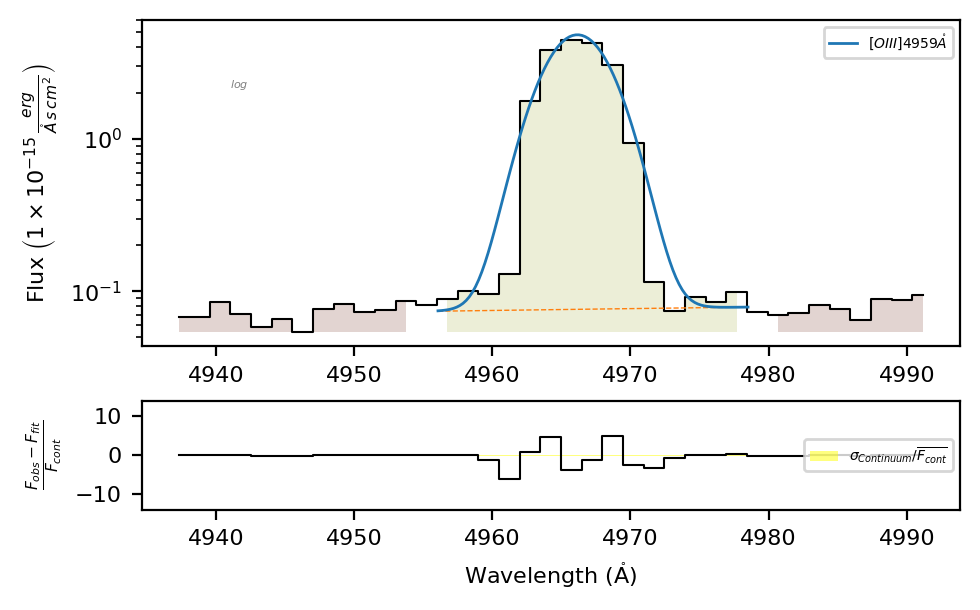

In [31]:
spec3.fit.bands(4959)
spec3.plot.bands()

In [32]:
# Line name, its location mask in the rest _frame and fit configuration
line3_S2 = 'S2_6716A_b'
band_edges3_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf3_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

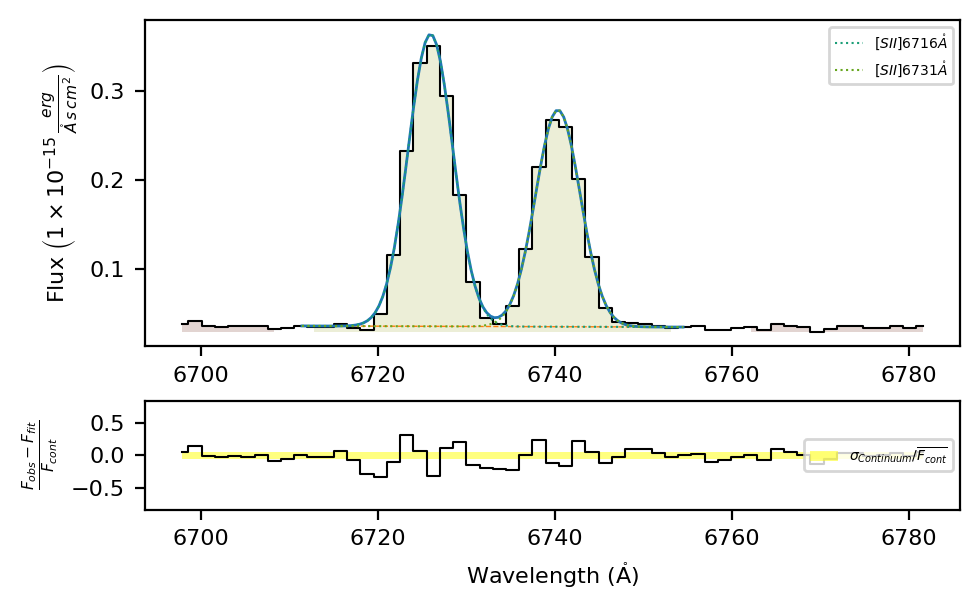

In [33]:
# New attempt including the fit configuration
spec3.fit.bands(line3_S2,band_edges3_S2, fit_conf=fit_conf3_S2)
spec3.plot.bands()

SLIT 7

In [34]:
hdul7 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_1D_f99_c00.fits', mode='update')
header7 = hdul7[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header7['FLUXSCAL'] = 1
header7
    
hdul7.flush()

In [35]:
print(header7)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2178 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-04T15:22:41' / Date FITS file was generated                  IRAF-TLM= '2024-07-04T15:22:41' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4021.7333984375 / RA at R

In [36]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file7 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_1D_f99_c00.fits"

#load the data
wave7, flux7, hdr7 = import_1313_fits(fits_file7)

In [37]:
spec7 = lime.Spectrum(wave7, flux7, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

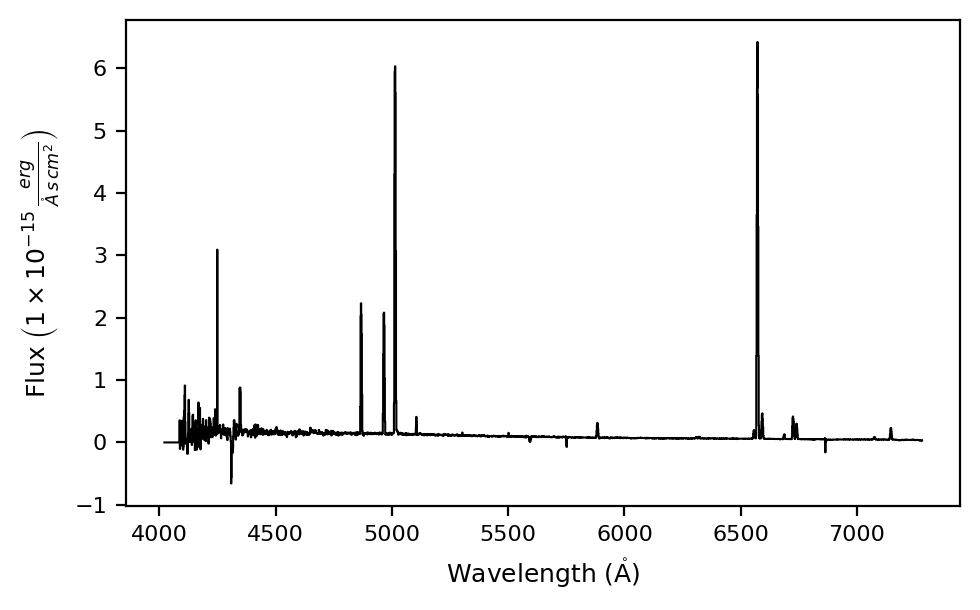

In [38]:
spec7.plot.spectrum(label='slit7_NGC1313')

In [39]:
# Line name, its location mask in the rest _frame and fit configuration
line7_Ha = 'H1_6563A_b'
band_edges7_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf7_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

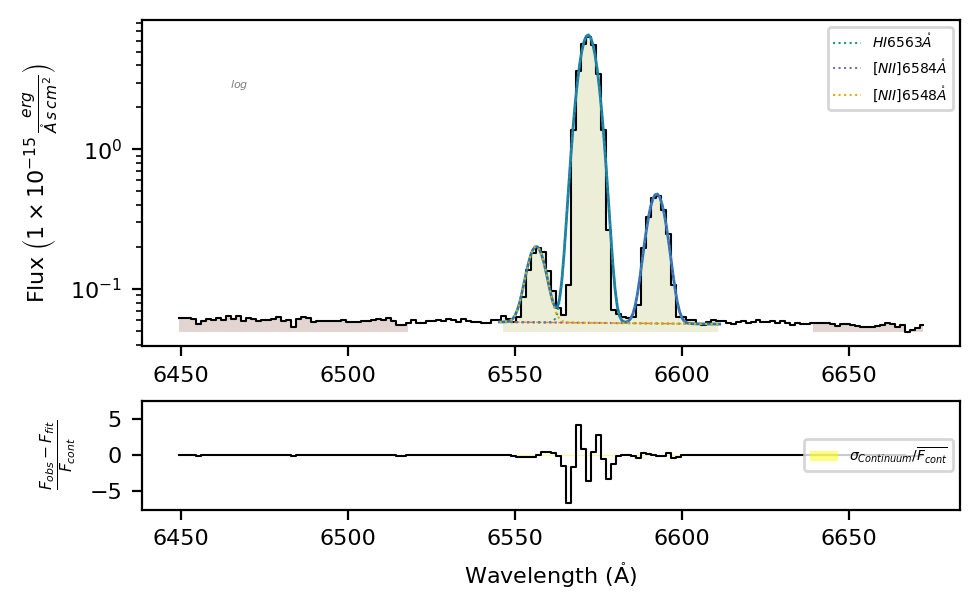

In [40]:
# New attempt including the fit configuration
spec7.fit.bands(line7_Ha, band_edges7_Ha, fit_conf=fit_conf7_Ha)
spec7.plot.bands()

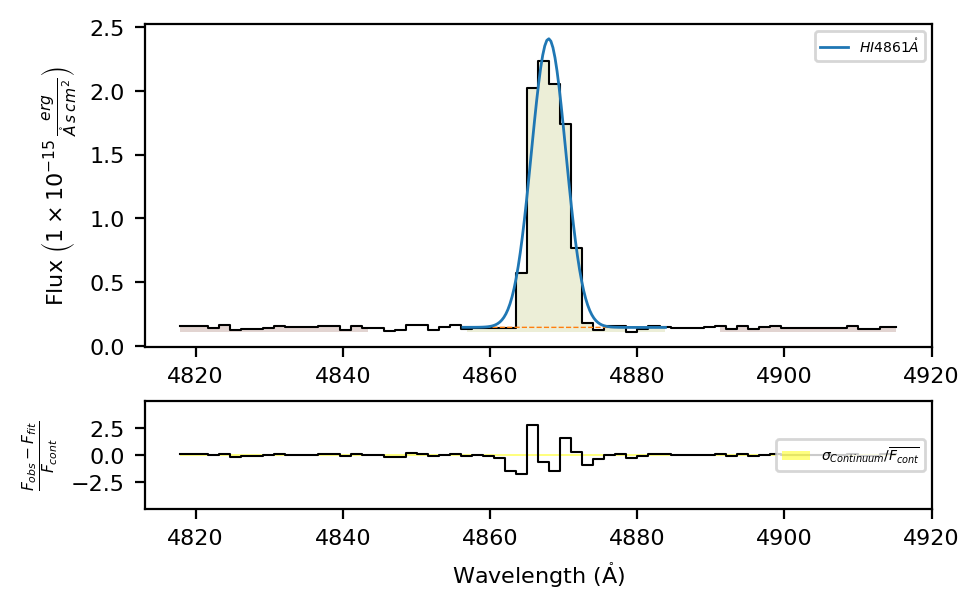

In [41]:
spec7.fit.bands(4861)
spec7.plot.bands()

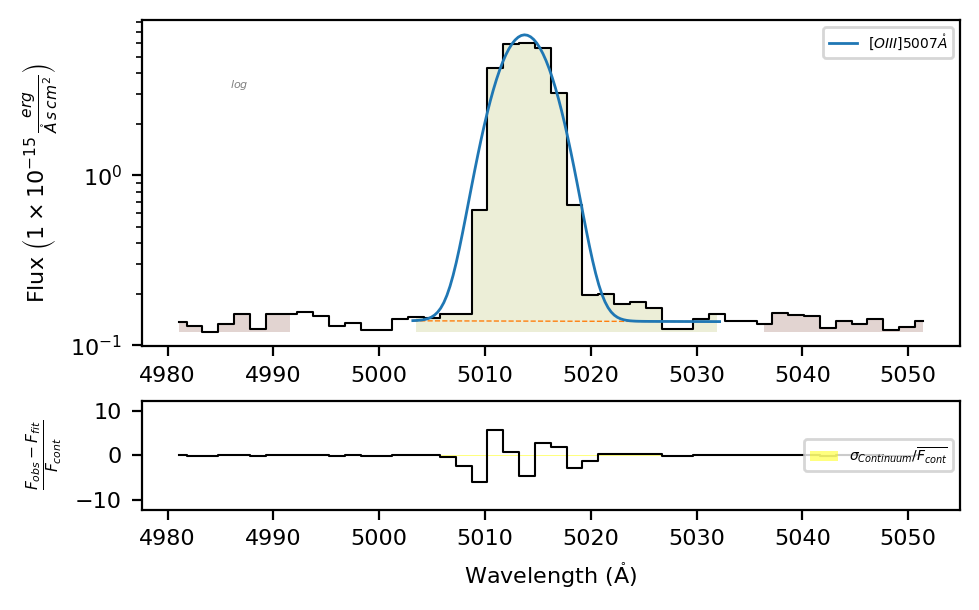

In [42]:
spec7.fit.bands('O3_5007A')
spec7.plot.bands()

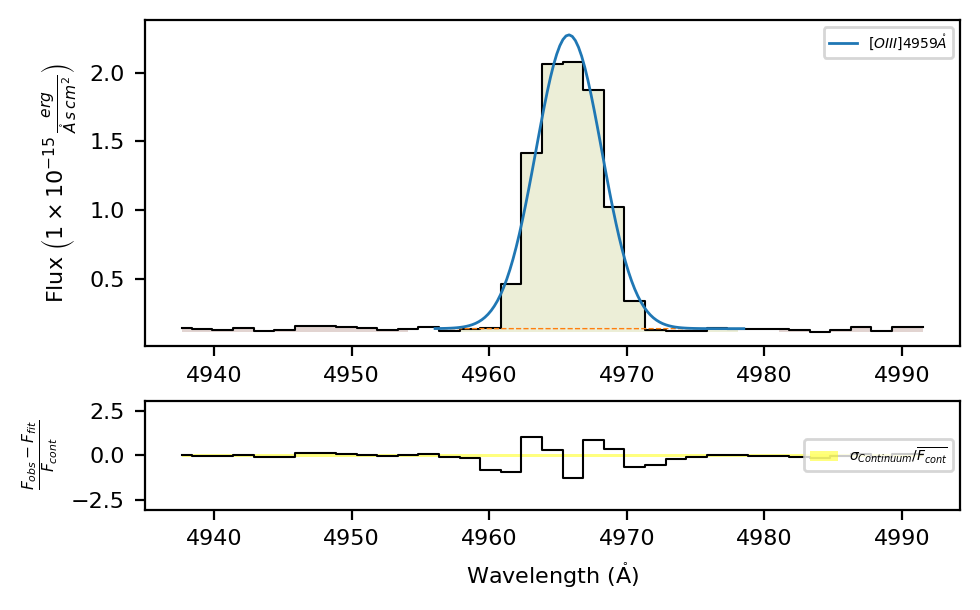

In [43]:
spec7.fit.bands(4959)
spec7.plot.bands()

In [44]:
# Line name, its location mask in the rest _frame and fit configuration
line7_S2 = 'S2_6716A_b'
band_edges7_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf7_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

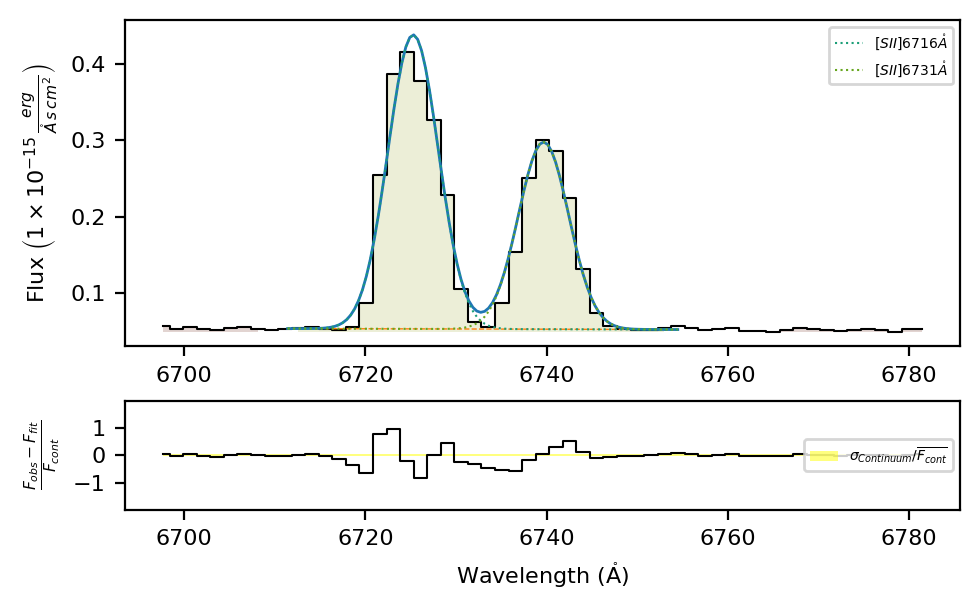

In [45]:
# New attempt including the fit configuration
spec7.fit.bands(line7_S2,band_edges7_S2, fit_conf=fit_conf7_S2)
spec7.plot.bands()

SLIT 9

In [46]:
hdul9 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_1D_f99_c00.fits', mode='update')
header9 = hdul9[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header9['FLUXSCAL'] = 1
header9
    
hdul9.flush()

In [47]:
print(header9)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2807 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4035.11450195312 / RA at R

In [48]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file9 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_1D_f99_c00.fits"

#load the data
wave9, flux9, hdr9 = import_1313_fits(fits_file9)

In [49]:
spec9 = lime.Spectrum(wave9, flux9, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

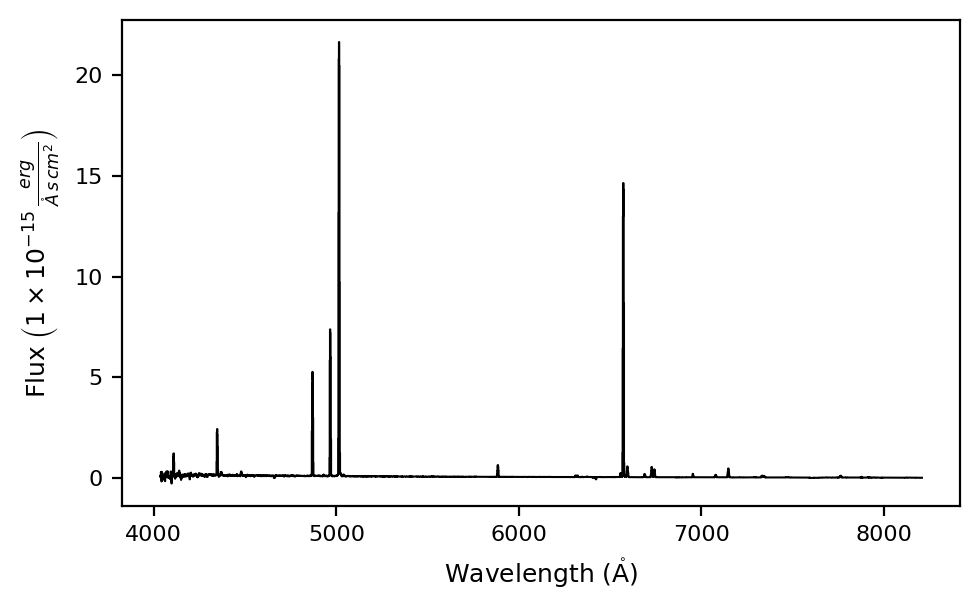

In [50]:
spec9.plot.spectrum(label='slit9_NGC1313')

In [51]:
# Line name, its location mask in the rest _frame and fit configuration
line9_Ha = 'H1_6563A_b'
band_edges9_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf9_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

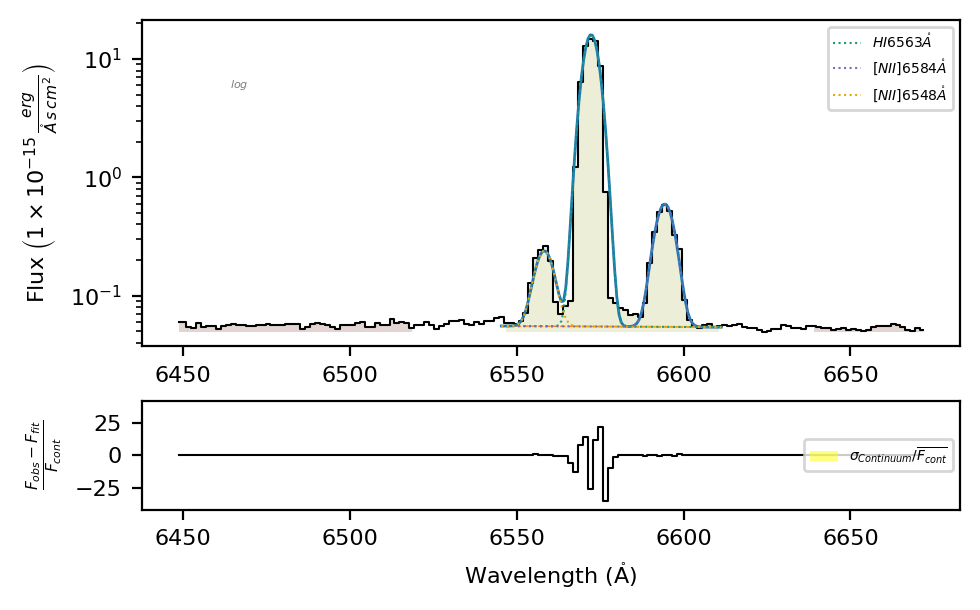

In [52]:
# New attempt including the fit configuration
spec9.fit.bands(line9_Ha, band_edges9_Ha, fit_conf=fit_conf9_Ha)
spec9.plot.bands()

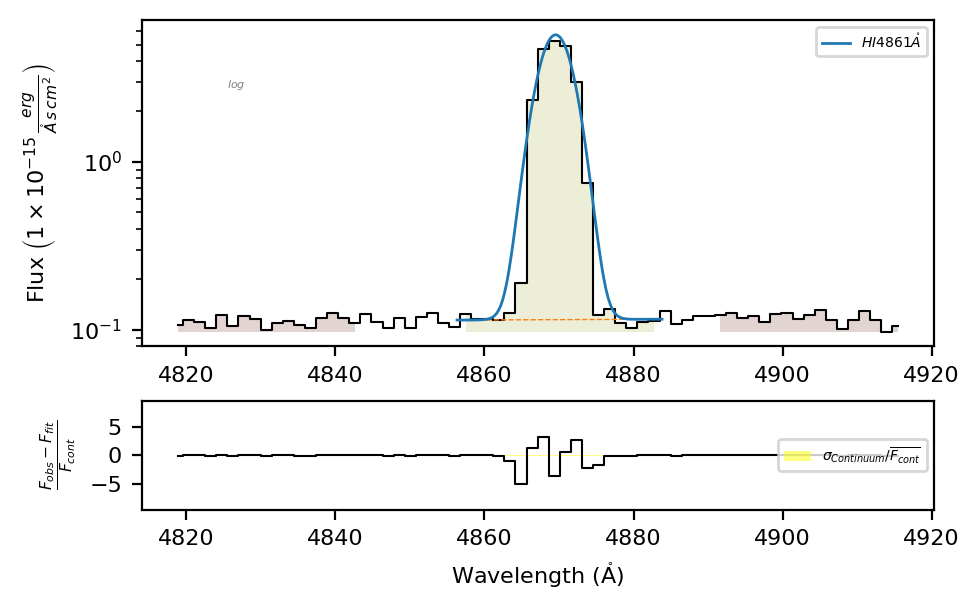

In [53]:
spec9.fit.bands(4861)
spec9.plot.bands()

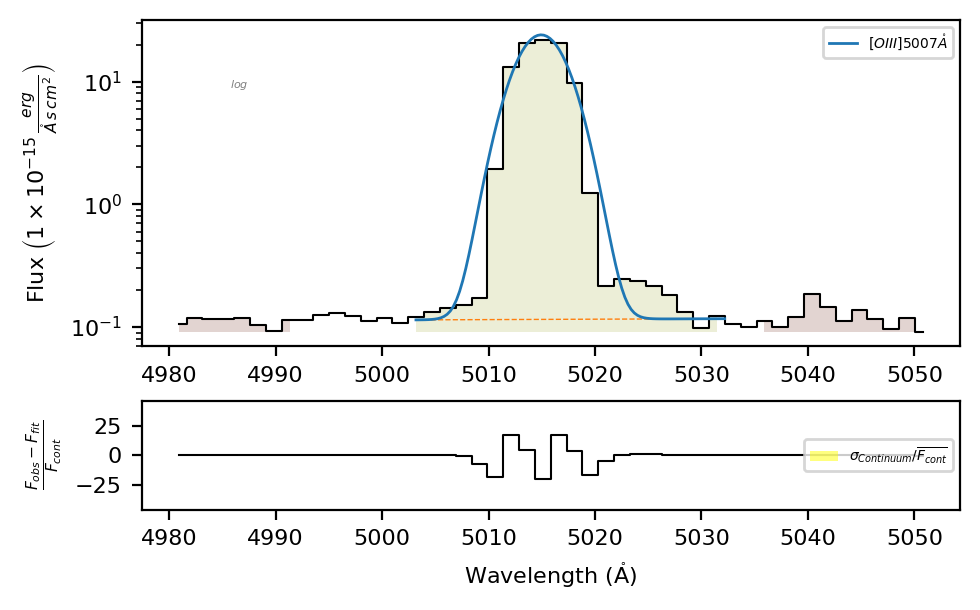

In [54]:
spec9.fit.bands(5007)
spec9.plot.bands()

In [55]:
#fit config for [OIII]
line9_O3 = 'O3_5007A_b'
fit_conf9_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.2'},
                'He1_5016A_amp':{'expr':'0.15'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

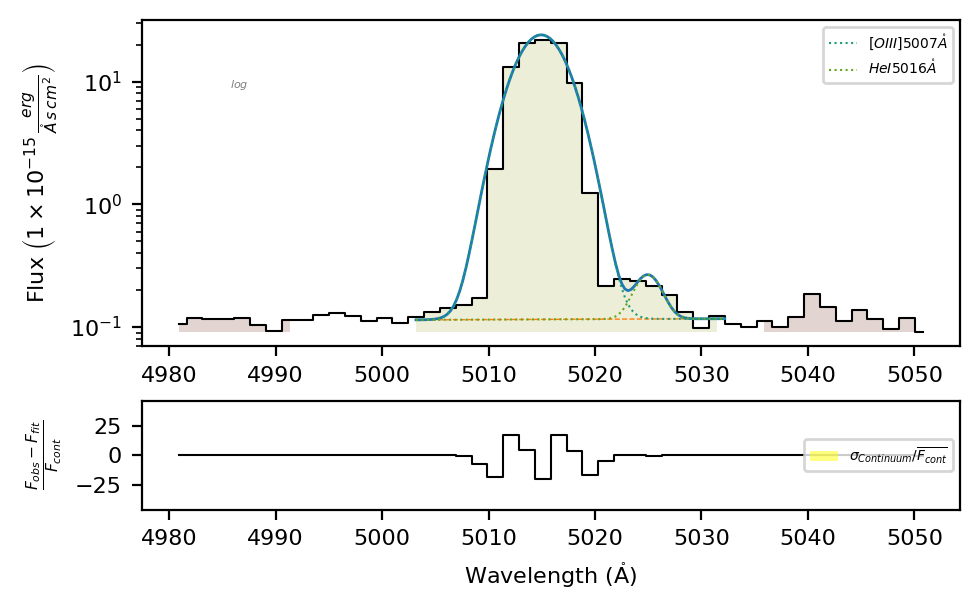

In [56]:
spec9.fit.bands(line9_O3, fit_conf=fit_conf9_O3)
spec9.plot.bands()

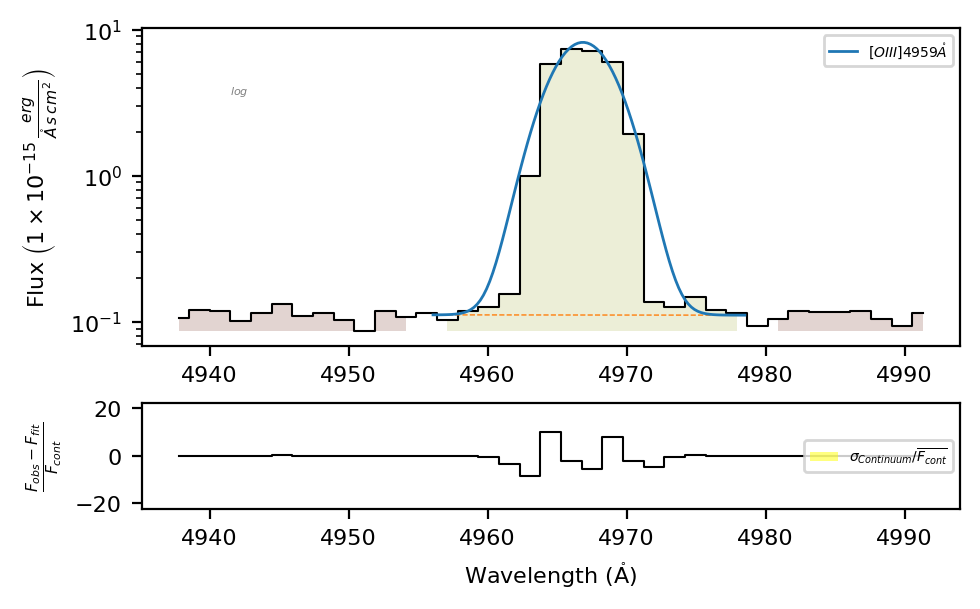

In [57]:
spec9.fit.bands(4959)
spec9.plot.bands()

In [58]:
# Line name, its location mask in the rest _frame and fit configuration
line9_S2 = 'S2_6716A_b'
band_edges9_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf9_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

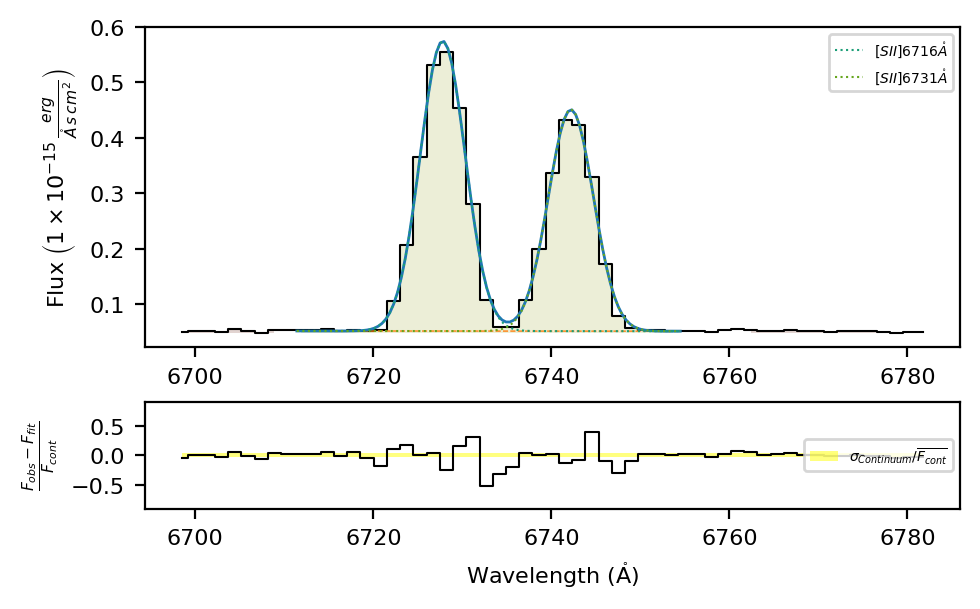

In [59]:
# New attempt including the fit configuration
spec9.fit.bands(line9_S2,band_edges9_S2, fit_conf=fit_conf9_S2)
spec9.plot.bands()

SLIT 11

In [60]:
hdul11 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_1D_f99_c00.fits', mode='update')
header11 = hdul11[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header11['FLUXSCAL'] = 1
header11
    
hdul11.flush()

In [61]:
print(header11)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2789 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4035.43627929687 / RA at R

In [62]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file11 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_1D_f99_c00.fits"

#load the data
wave11, flux11, hdr11 = import_1313_fits(fits_file11)

In [63]:
spec11 = lime.Spectrum(wave11, flux11, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

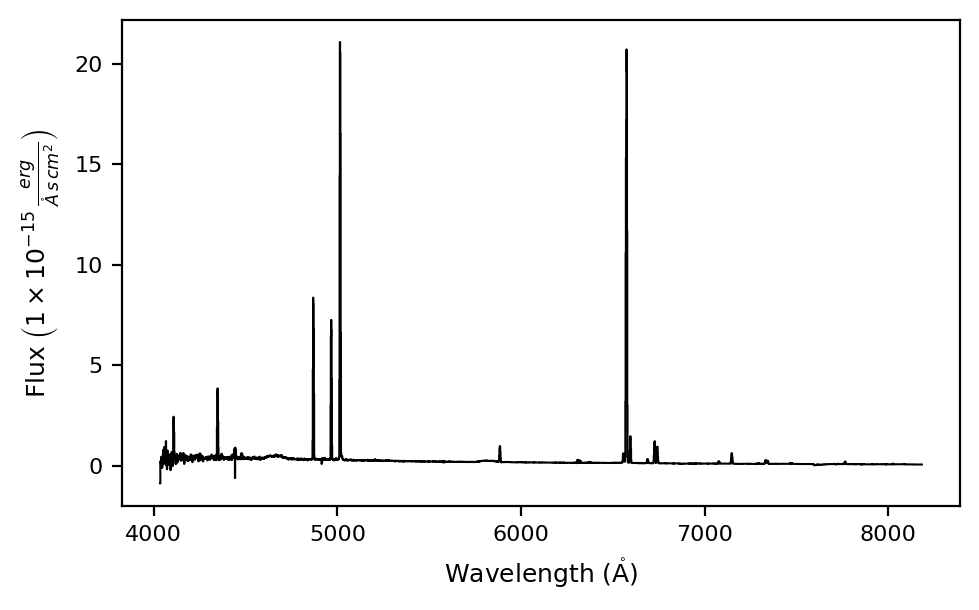

In [64]:
spec11.plot.spectrum(label='slit11_NGC1313')

In [65]:
# Line name, its location mask in the rest _frame and fit configuration
line11_Ha = 'H1_6563A_b'
band_edges11_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf11_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

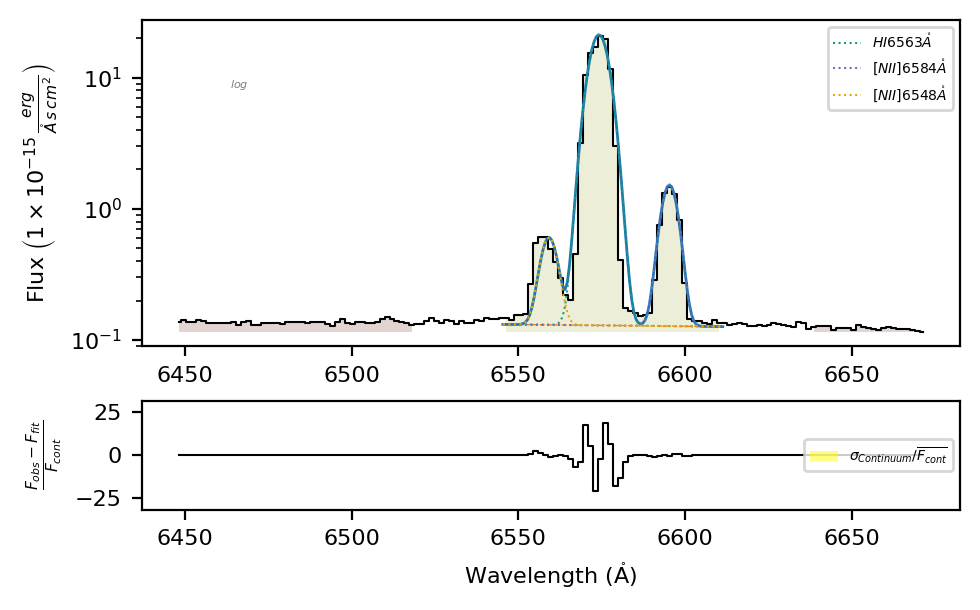

In [66]:
# New attempt including the fit configuration
spec11.fit.bands(line11_Ha, band_edges11_Ha, fit_conf=fit_conf11_Ha)
spec11.plot.bands()

In [67]:
# Line name and its location mask in the rest _frame
line11_Hb = 'H1_4861A'
#band_edges = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4908.40])
band_edges11_Hb = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4900.40])

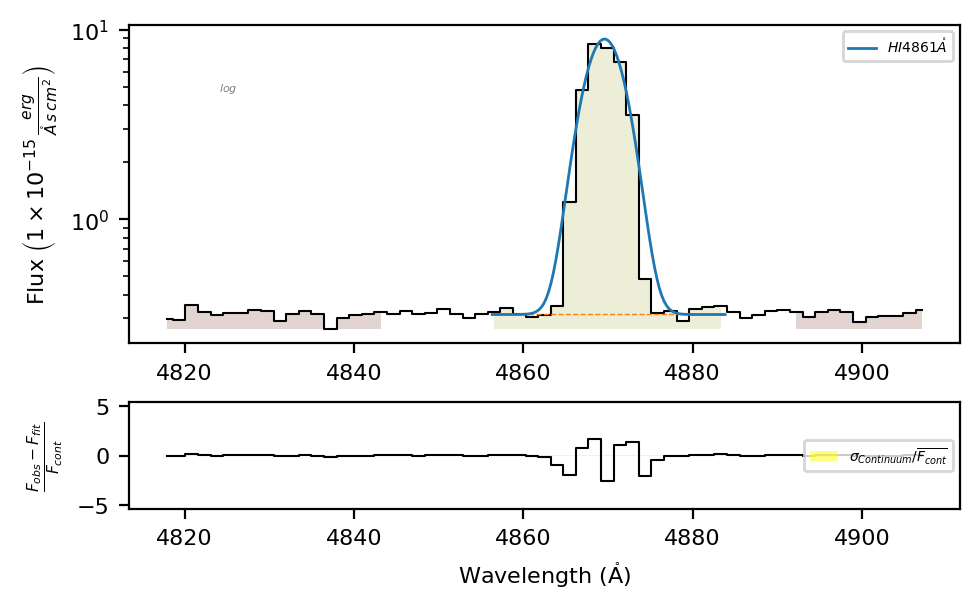

In [68]:
# Run the fitting and plot it
spec11.fit.bands(line11_Hb, band_edges11_Hb)
spec11.plot.bands()

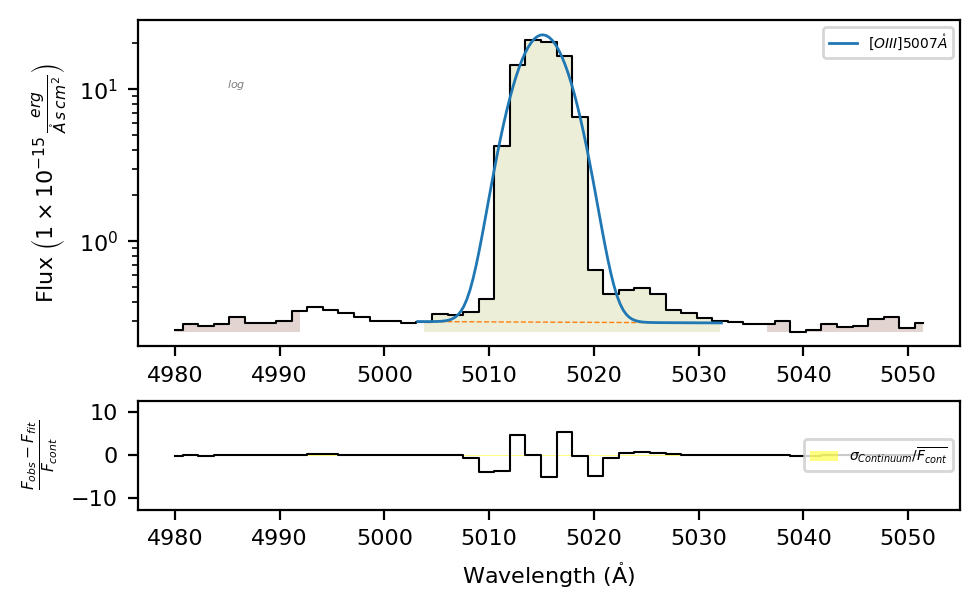

In [69]:
spec11.fit.bands(5007)
spec11.plot.bands()

In [70]:
#fit config for [OIII]
line11_O3 = 'O3_5007A_b'
fit_conf11_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.2'},
                'He1_5016A_amp':{'expr':'0.3'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

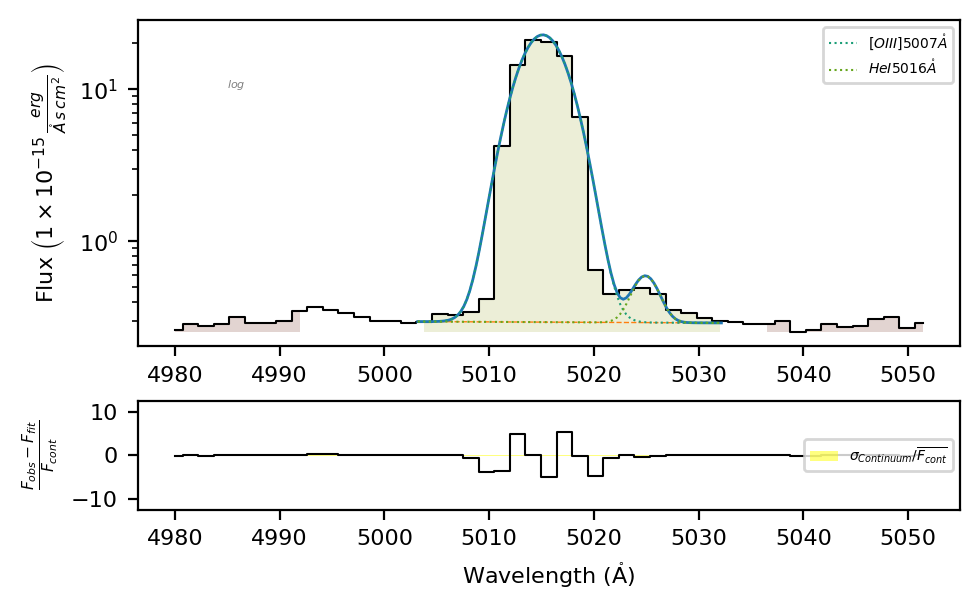

In [71]:
spec11.fit.bands(line11_O3, fit_conf=fit_conf11_O3)
spec11.plot.bands()

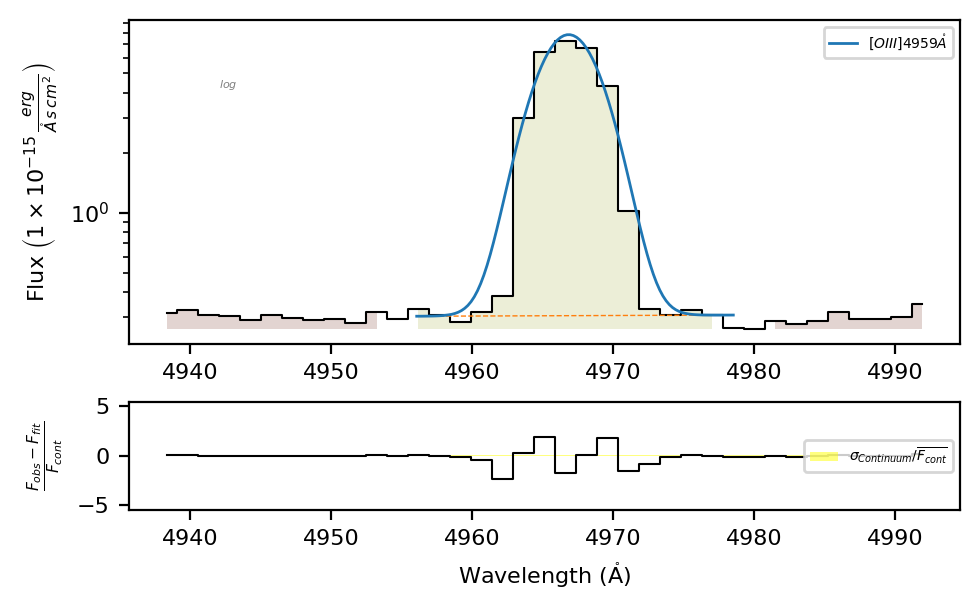

In [72]:
spec11.fit.bands(4959)
spec11.plot.bands()

In [73]:
# Line name, its location mask in the rest _frame and fit configuration
line11_S2 = 'S2_6716A_b'
band_edges11_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf11_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

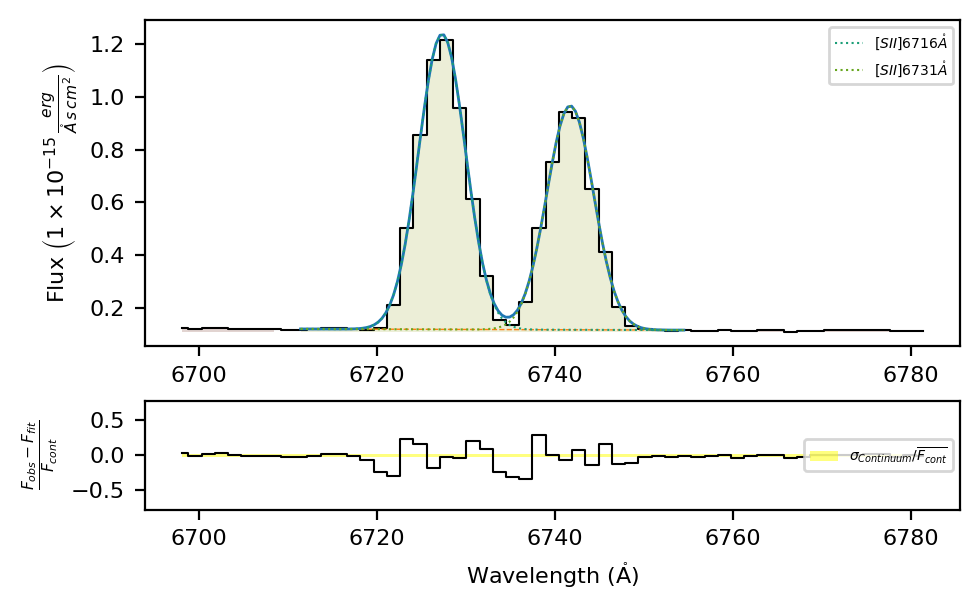

In [74]:
# New attempt including the fit configuration
spec11.fit.bands(line11_S2,band_edges11_S2, fit_conf=fit_conf11_S2)
spec11.plot.bands()

SLIT 17

In [75]:
hdul17 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_1D_f99_c00.fits', mode='update')
header17 = hdul17[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header17['FLUXSCAL'] = 1
header17
    
hdul17.flush()

In [76]:
print(header17)


SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2325 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-03T21:09:20' / Date FITS file was generated                  IRAF-TLM= '2024-07-03T21:09:20' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4031.8603515625 / RA at R

In [77]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file17 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_1D_f99_c00.fits"

#load the data
wave17, flux17, hdr17 = import_1313_fits(fits_file17)

In [78]:
spec17 = lime.Spectrum(wave17, flux17, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

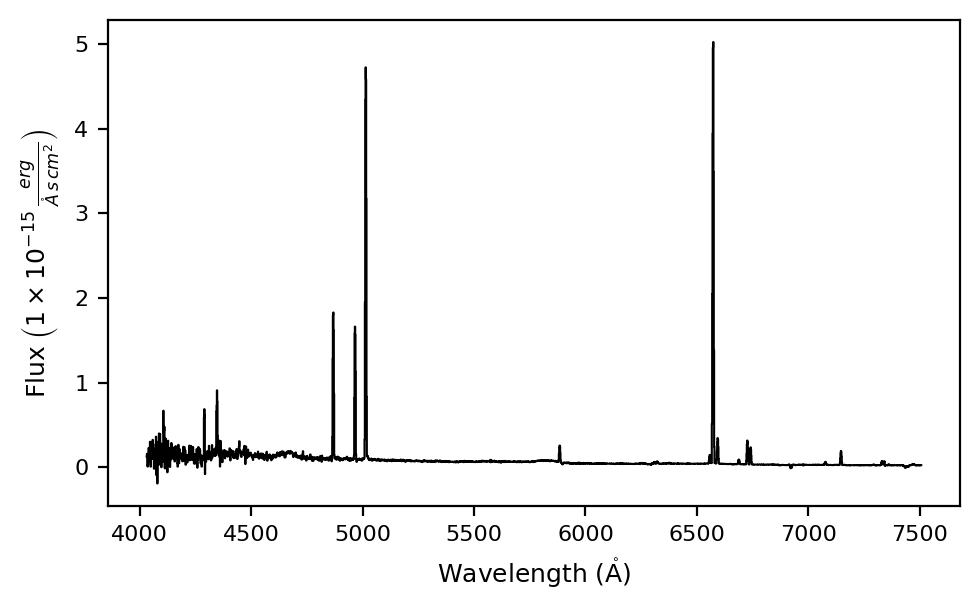

In [79]:
spec17.plot.spectrum(label='slit17_NGC1313')

In [80]:
# Line name, its location mask in the rest _frame and fit configuration
line17_Ha = 'H1_6563A_b'
band_edges17_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf17_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

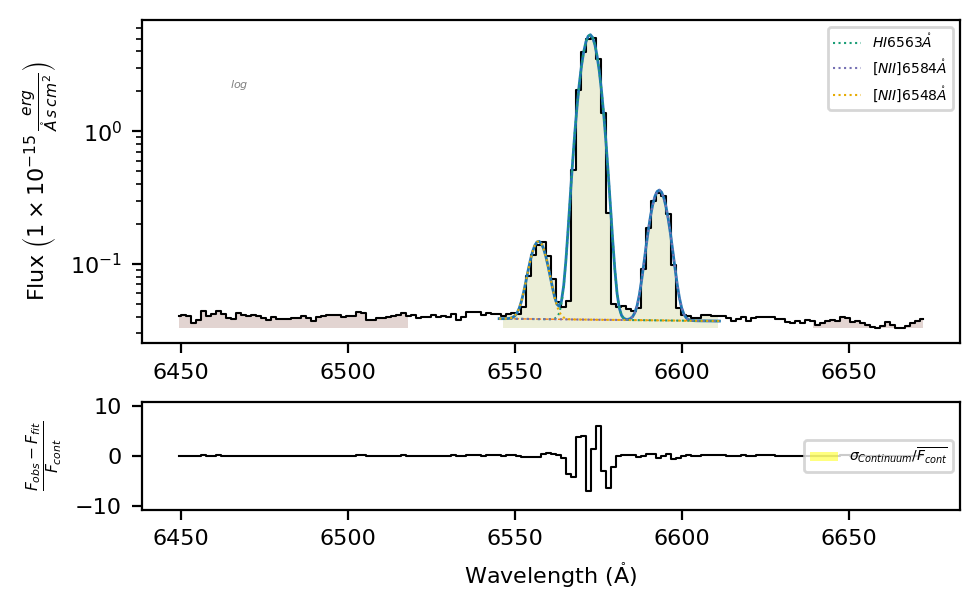

In [81]:
# New attempt including the fit configuration
spec17.fit.bands(line17_Ha, band_edges17_Ha, fit_conf=fit_conf17_Ha)
spec17.plot.bands()

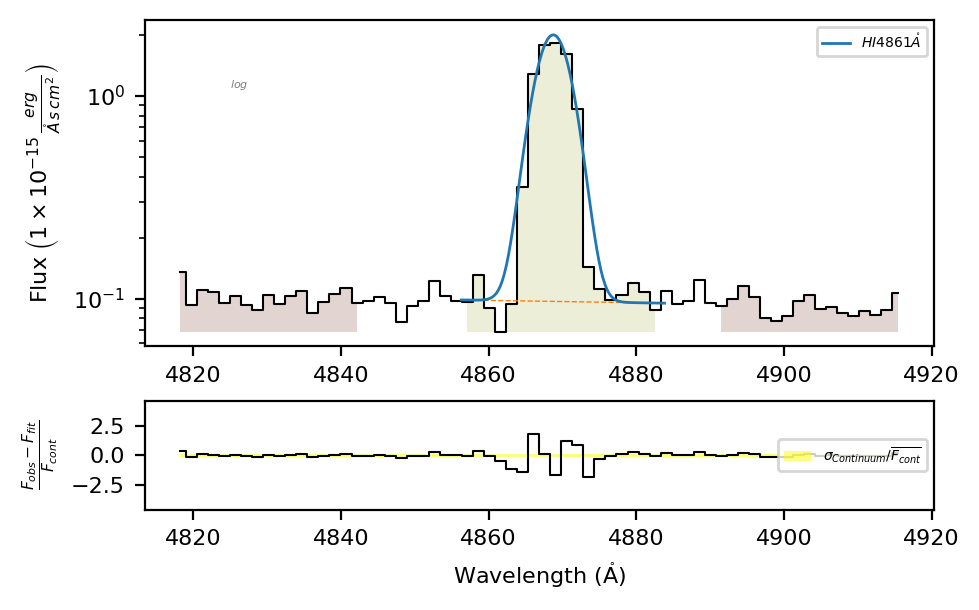

In [82]:
spec17.fit.bands(4861)
spec17.plot.bands()

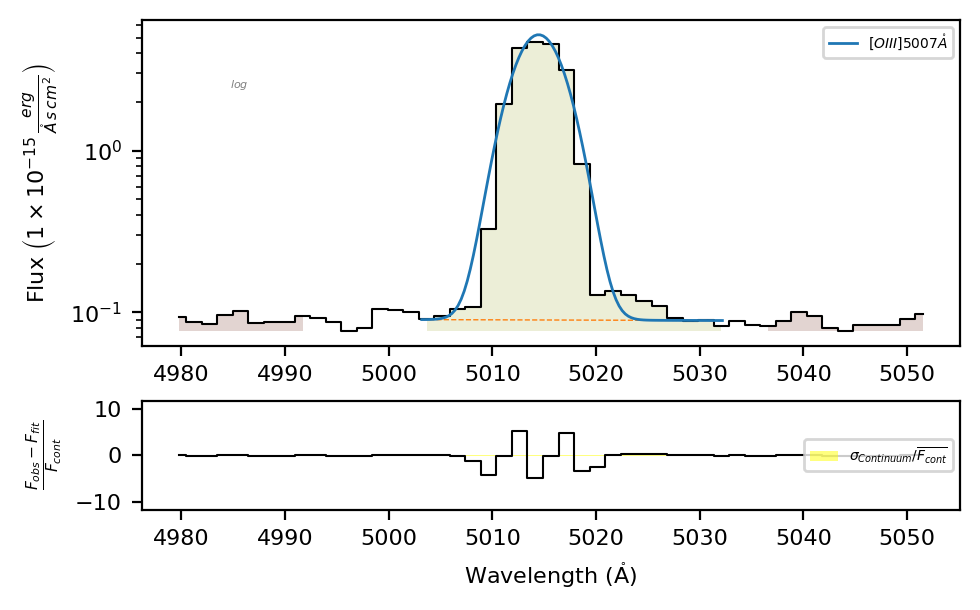

In [83]:
spec17.fit.bands(5007)
spec17.plot.bands()

In [84]:
#fit config for [OIII]
line17_O3 = 'O3_5007A_b'
fit_conf17_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.2'},
                'He1_5016A_amp':{'expr':'0.05'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

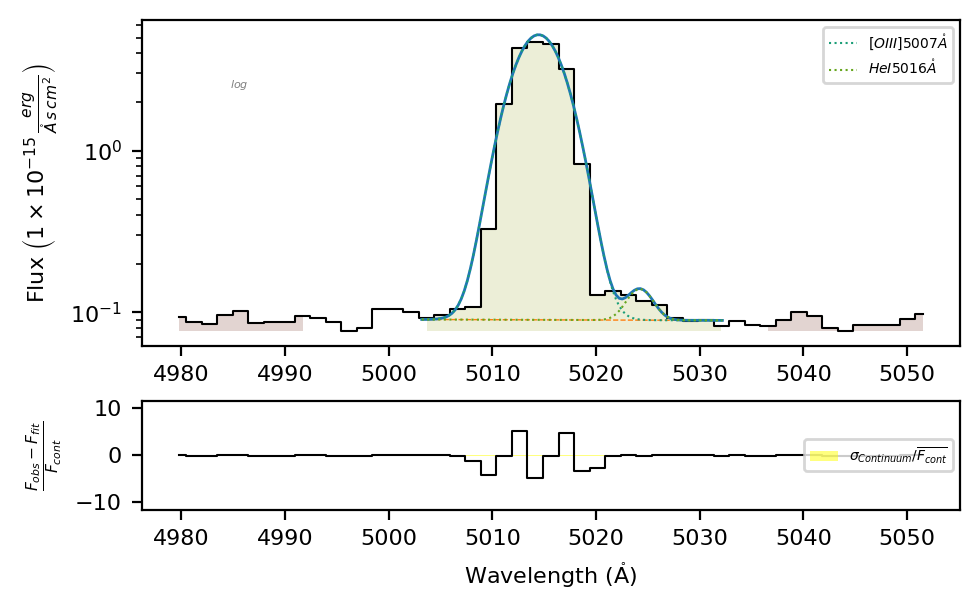

In [85]:
spec17.fit.bands(line17_O3, fit_conf=fit_conf17_O3)
spec17.plot.bands()

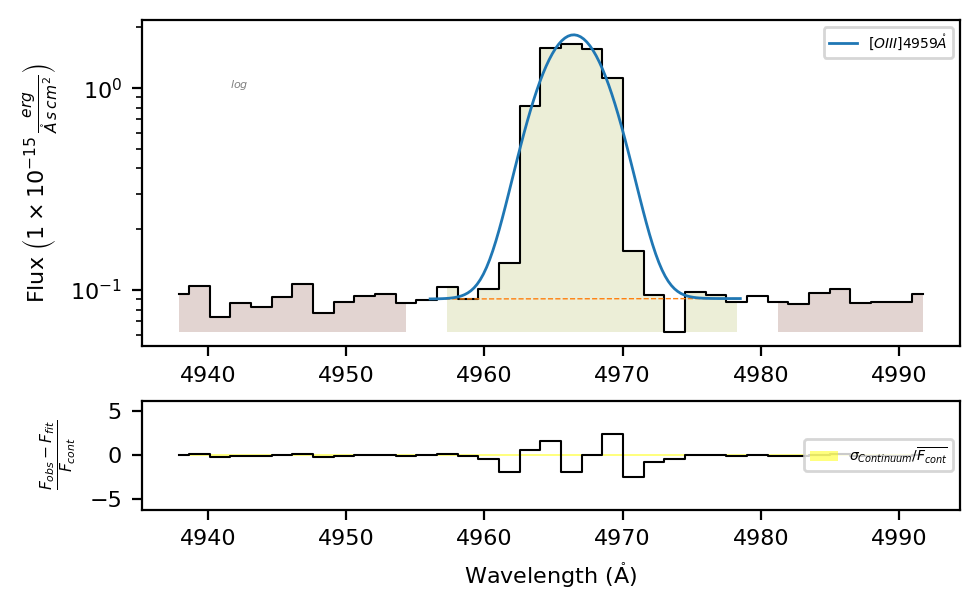

In [86]:
spec17.fit.bands(4959)
spec17.plot.bands()

In [87]:
# Line name, its location mask in the rest _frame and fit configuration
line17_S2 = 'S2_6716A_b'
band_edges17_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf17_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

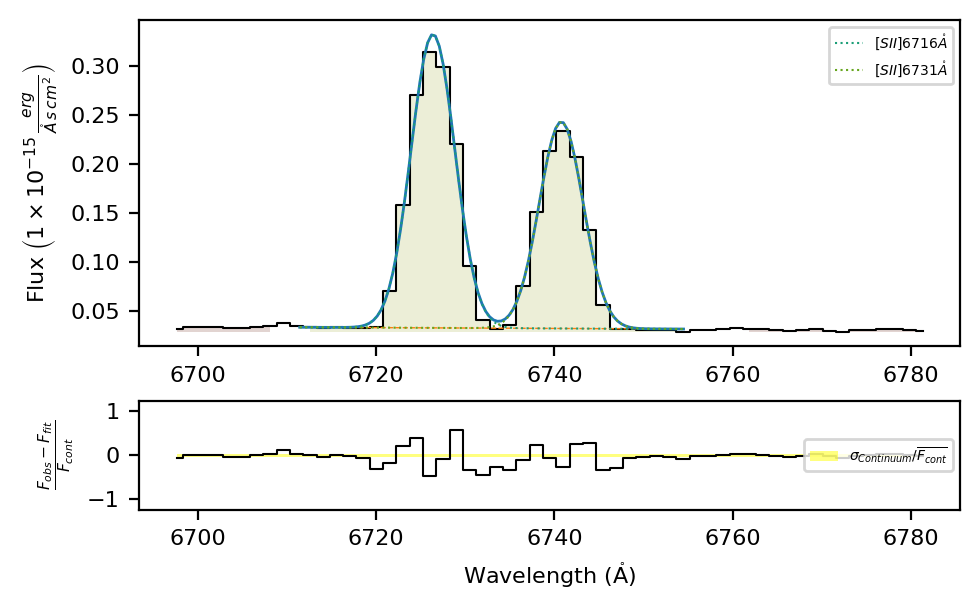

In [88]:
# New attempt including the fit configuration
spec17.fit.bands(line17_S2,band_edges17_S2, fit_conf=fit_conf17_S2)
spec17.plot.bands()

SLIT 19

In [89]:
hdul19 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_1D_f99_c00.fits', mode='update')
header19 = hdul19[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header19['FLUXSCAL'] = 1
header19
    
hdul19.flush()

In [90]:
print(header19)


SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2680 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-04T15:37:43' / Date FITS file was generated                  IRAF-TLM= '2024-07-04T15:37:43' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.97583007813 / RA at R

In [91]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file19 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_1D_f99_c00.fits"

#load the data
wave19, flux19, hdr19 = import_1313_fits(fits_file19)

In [92]:
spec19 = lime.Spectrum(wave19, flux19, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

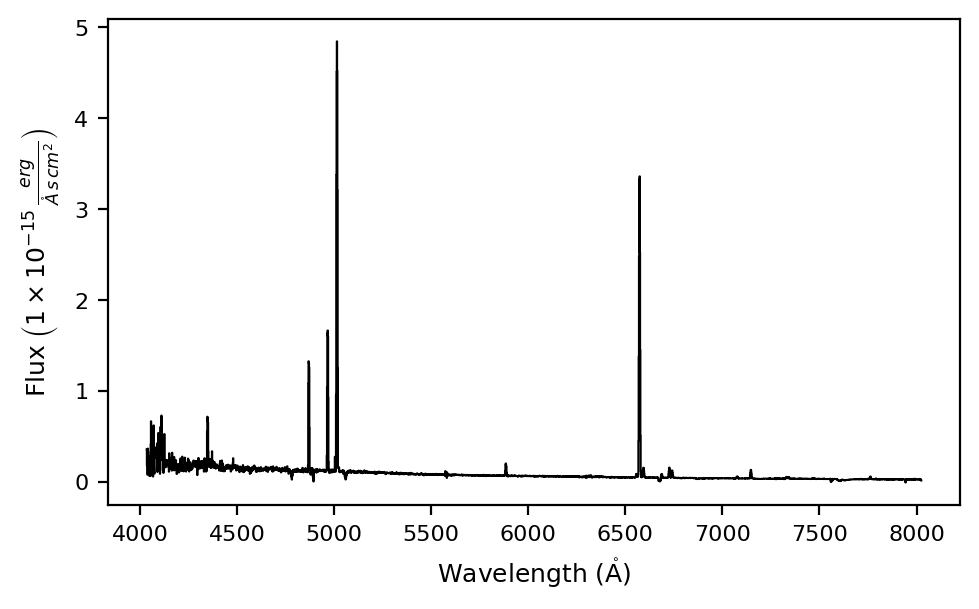

In [93]:
spec19.plot.spectrum(label='slit19_NGC1313')

In [94]:
# Line name, its location mask in the rest _frame and fit configuration
line19_Ha = 'H1_6563A_b'
#band_edges19_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
band_edges19_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6658.82])
fit_conf19_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

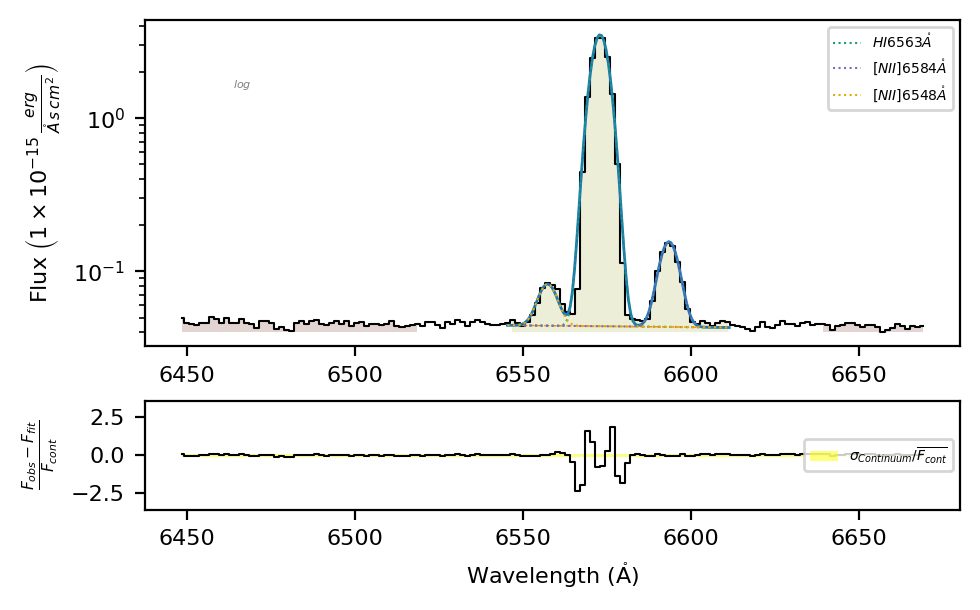

In [95]:
# New attempt including the fit configuration
spec19.fit.bands(line19_Ha, band_edges19_Ha, fit_conf=fit_conf19_Ha)
spec19.plot.bands()

In [96]:
# Line name and its location mask in the rest _frame
line19_Hb = 'H1_4861A'
band_edges19_Hb = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4889.13, 4908.40])

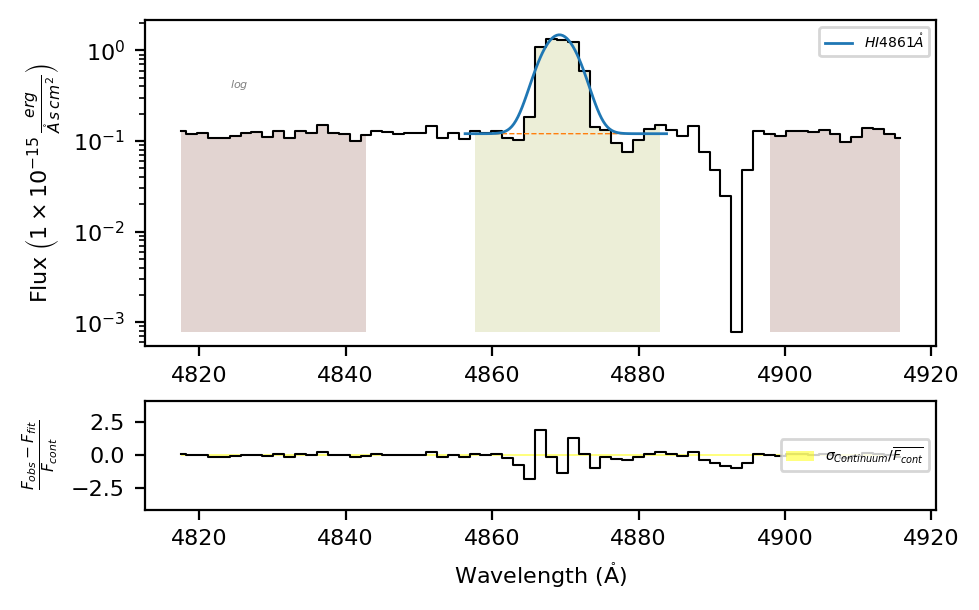

In [97]:
spec19.fit.bands(line19_Hb, band_edges19_Hb)
spec19.plot.bands()

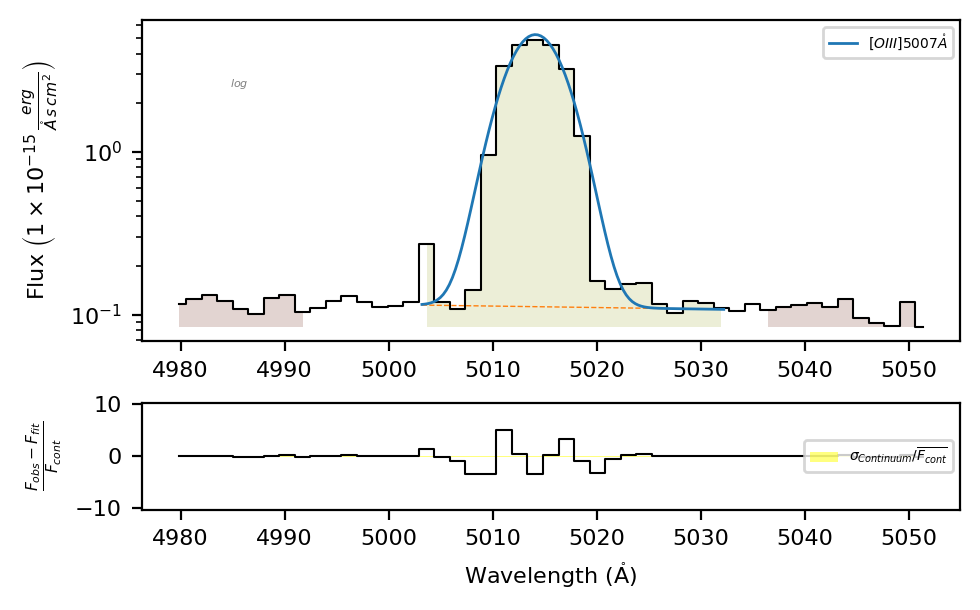

In [98]:
spec19.fit.bands(5007)
spec19.plot.bands()

In [99]:
#fit config for [OIII]
line19_O3 = 'O3_5007A_b'
fit_conf19_O3 = {'O3_5007A_b' : 'O3_5007A+He1_5016A',
                'He1_5016A_sigma' : {'expr':'1.2'},
                'He1_5016A_amp':{'expr':'0.05'},
                'He1_5016A_center': {'min':5012,'max':5019}
                }

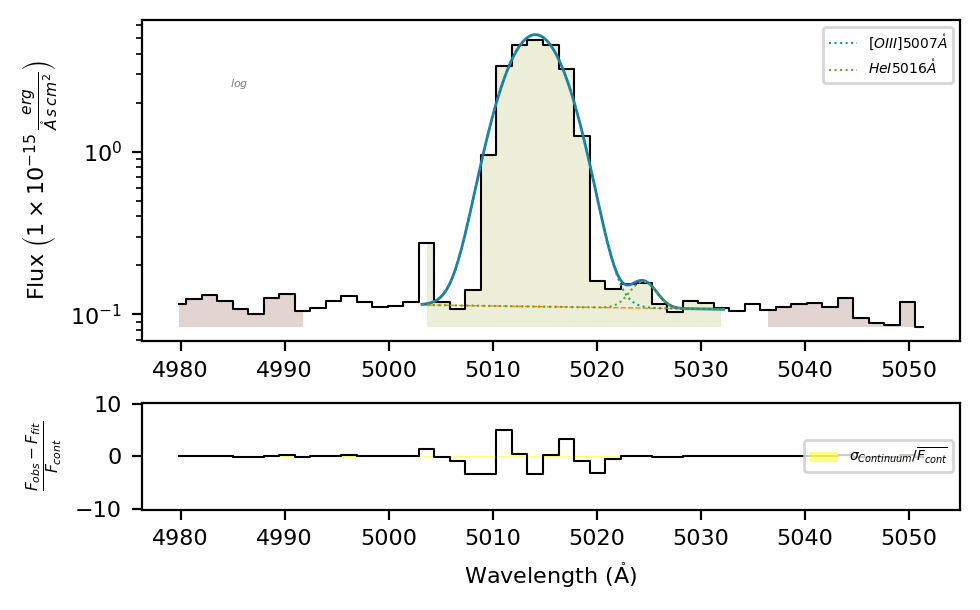

In [100]:
spec19.fit.bands(line19_O3, fit_conf=fit_conf19_O3)
spec19.plot.bands()

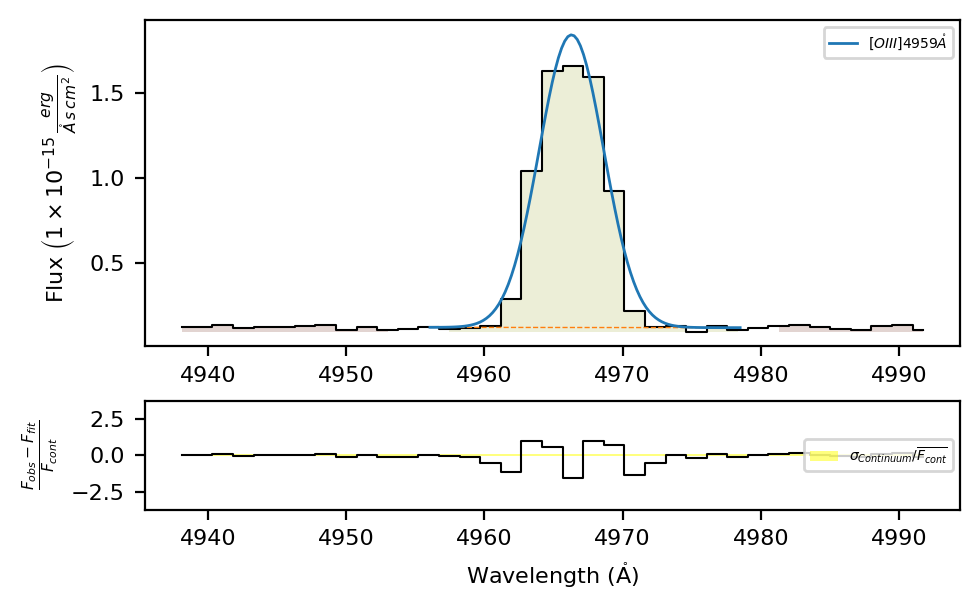

In [101]:
spec19.fit.bands(4959)
spec19.plot.bands()

In [102]:
# Line name, its location mask in the rest _frame and fit configuration
line19_S2 = 'S2_6716A_b'
band_edges19_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf19_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

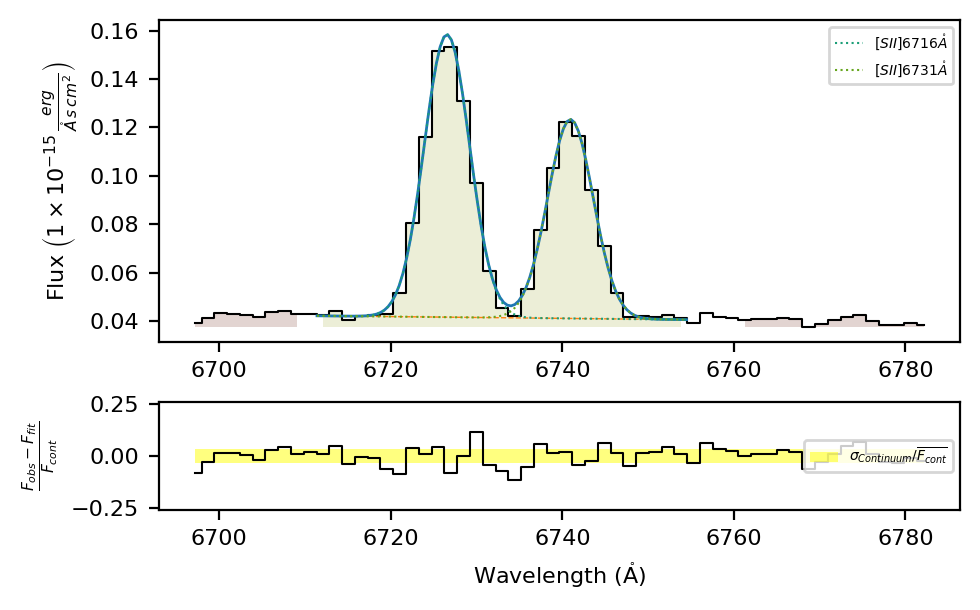

In [103]:
# New attempt including the fit configuration
spec19.fit.bands(line19_S2,band_edges19_S2, fit_conf=fit_conf19_S2)
spec19.plot.bands()

SLIT 21

In [104]:
hdul21 = fits.open('../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_1D_f99_c00.fits', mode='update')
header21 = hdul21[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header21['FLUXSCAL'] = 1
header21
    
hdul21.flush()

In [105]:
print(header21)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2799 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-07-04T15:37:43' / Date FITS file was generated                  IRAF-TLM= '2024-07-04T15:37:43' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4035.5361328125 / RA at R

In [106]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file21 = "../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_1D_f99_c00.fits"

#load the data
wave21, flux21, hdr21 = import_1313_fits(fits_file21)

In [107]:
spec21 = lime.Spectrum(wave21, flux21, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

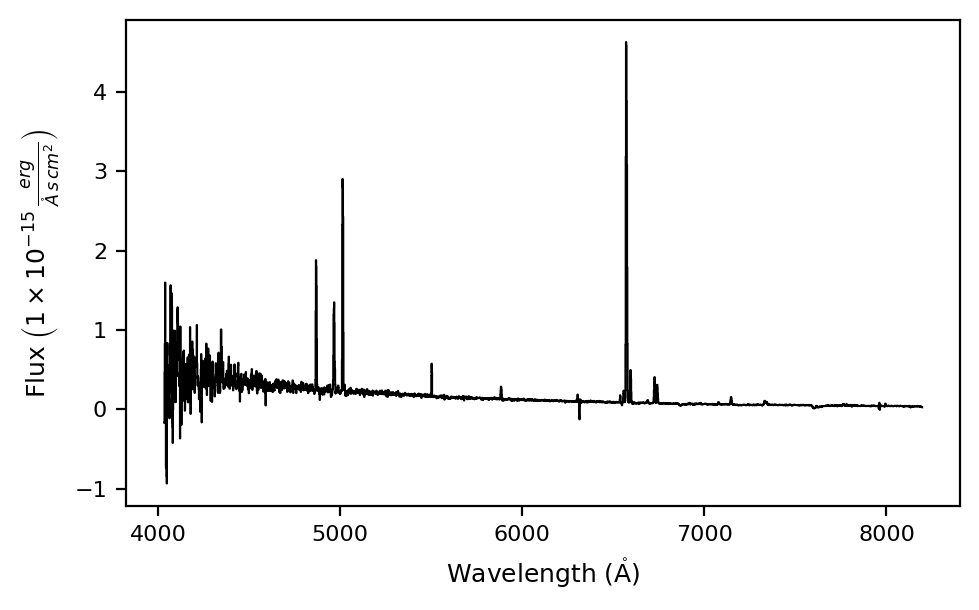

In [108]:
spec21.plot.spectrum(label='slit21_NGC1313')

In [109]:
# Line name, its location mask in the rest _frame and fit configuration
line21_Ha = 'H1_6563A_b'
band_edges21_Ha = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
fit_conf21_Ha = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

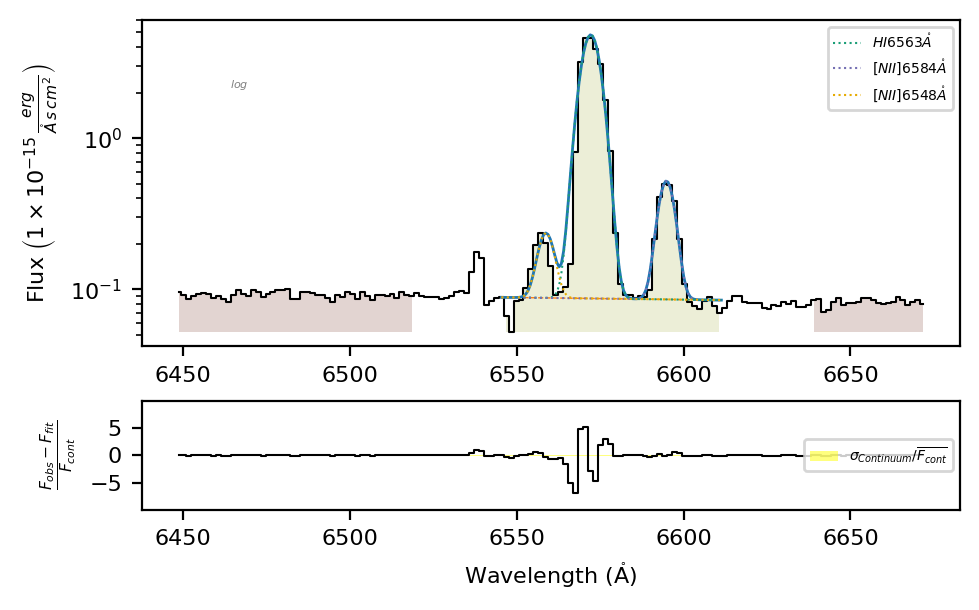

In [110]:
# New attempt including the fit configuration
spec21.fit.bands(line21_Ha, band_edges21_Ha, fit_conf=fit_conf21_Ha)
spec21.plot.bands()

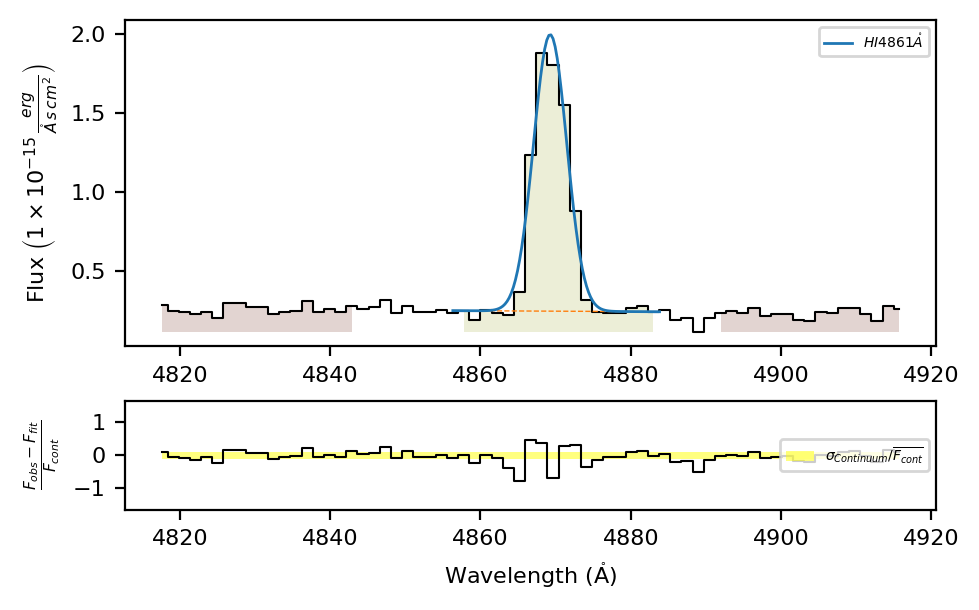

In [111]:
spec21.fit.bands(4861)
spec21.plot.bands()

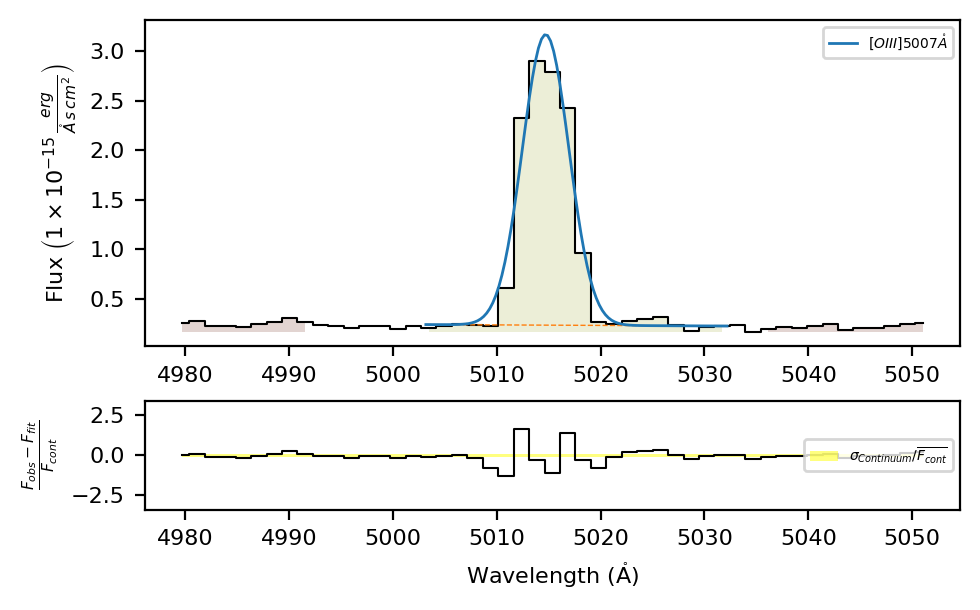

In [112]:
spec21.fit.bands(5007)
spec21.plot.bands()

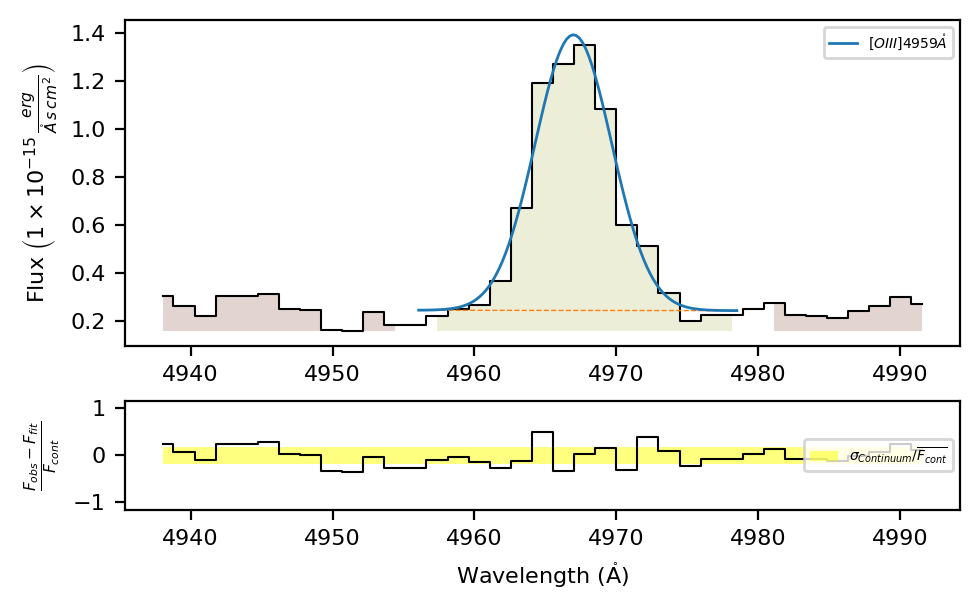

In [113]:
spec21.fit.bands(4959)
spec21.plot.bands()

In [114]:
# Line name, its location mask in the rest _frame and fit configuration
line21_S2 = 'S2_6716A_b'
band_edges21_S2 = np.array([6686.70, 6698.87, 6700.90, 6743.91, 6750.60, 6772.14])
fit_conf21_S2 = {'S2_6716A_b': 'S2_6716A+S2_6731A',
                'S2_6731A_kinem' : 'S2_6716A'}

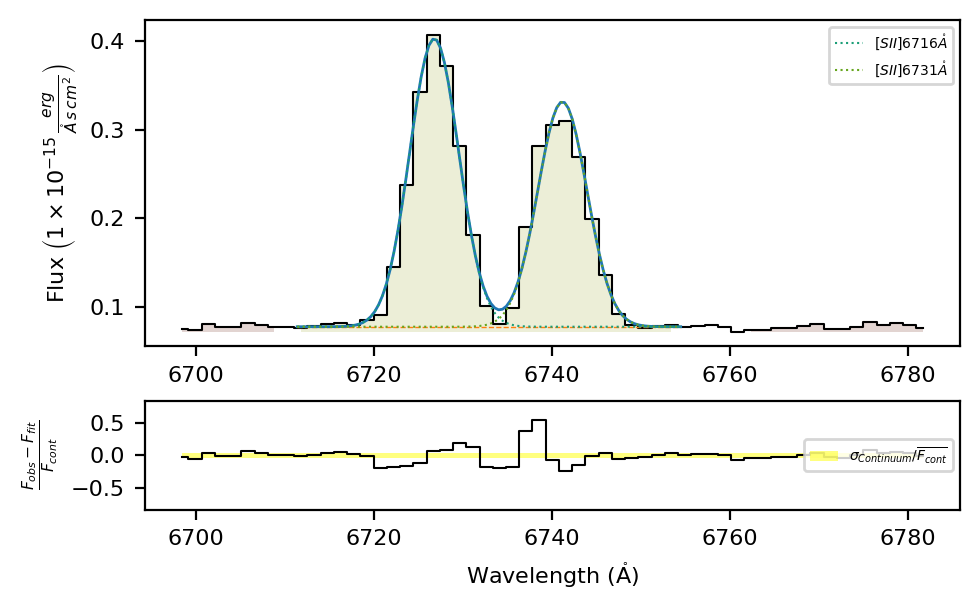

In [115]:
# New attempt including the fit configuration
spec21.fit.bands(line21_S2,band_edges21_S2, fit_conf=fit_conf21_S2)
spec21.plot.bands()

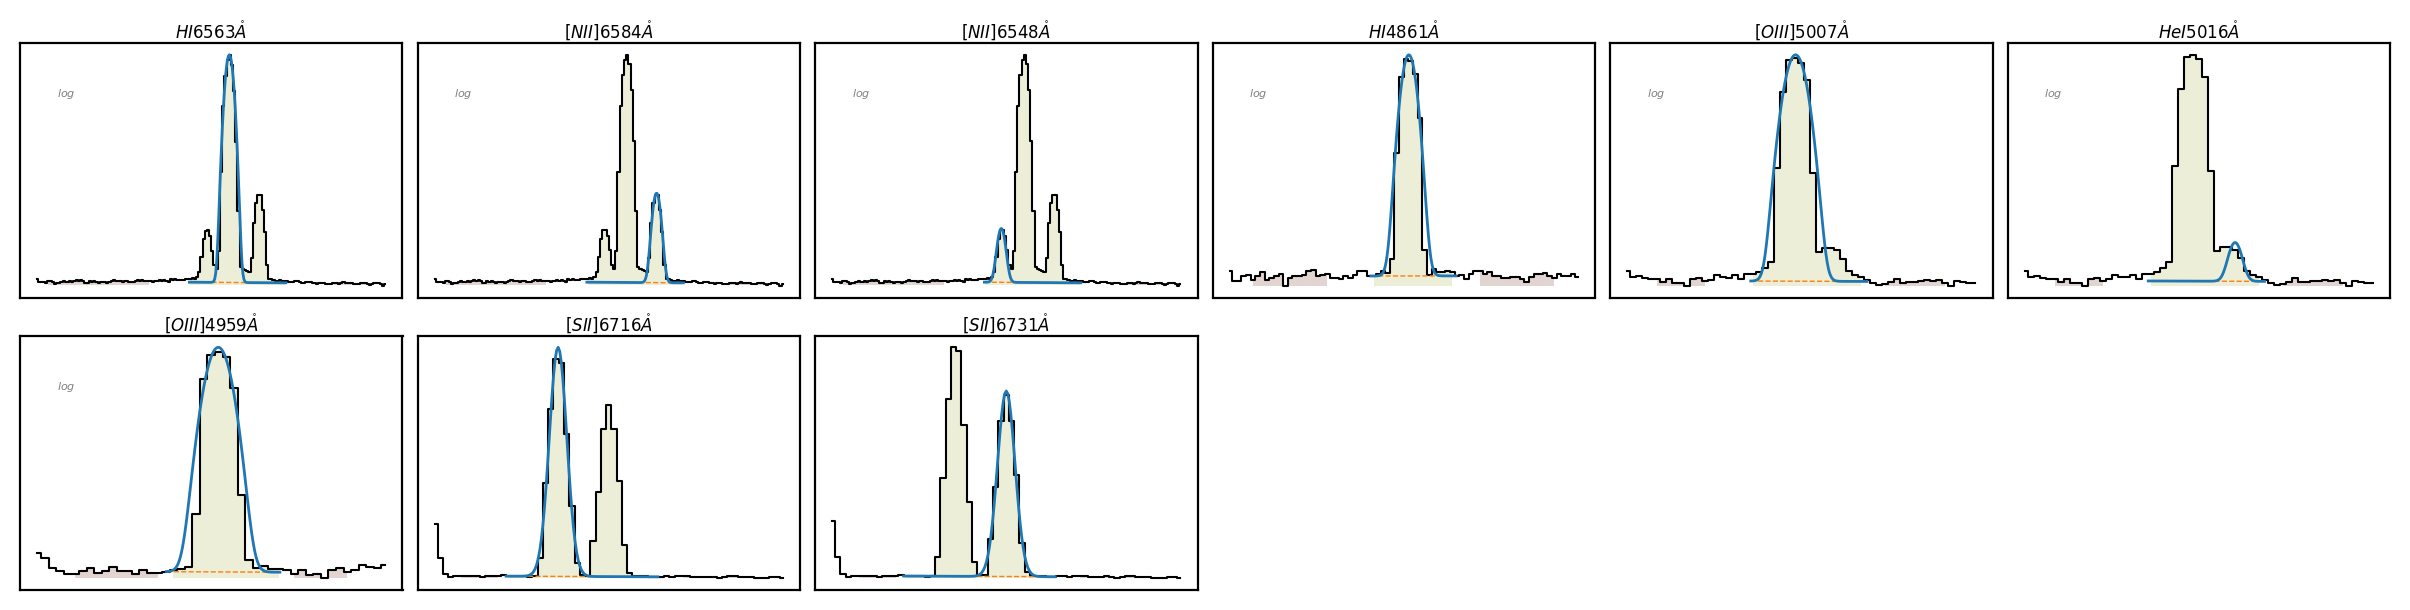

In [116]:
spec1.plot.grid()

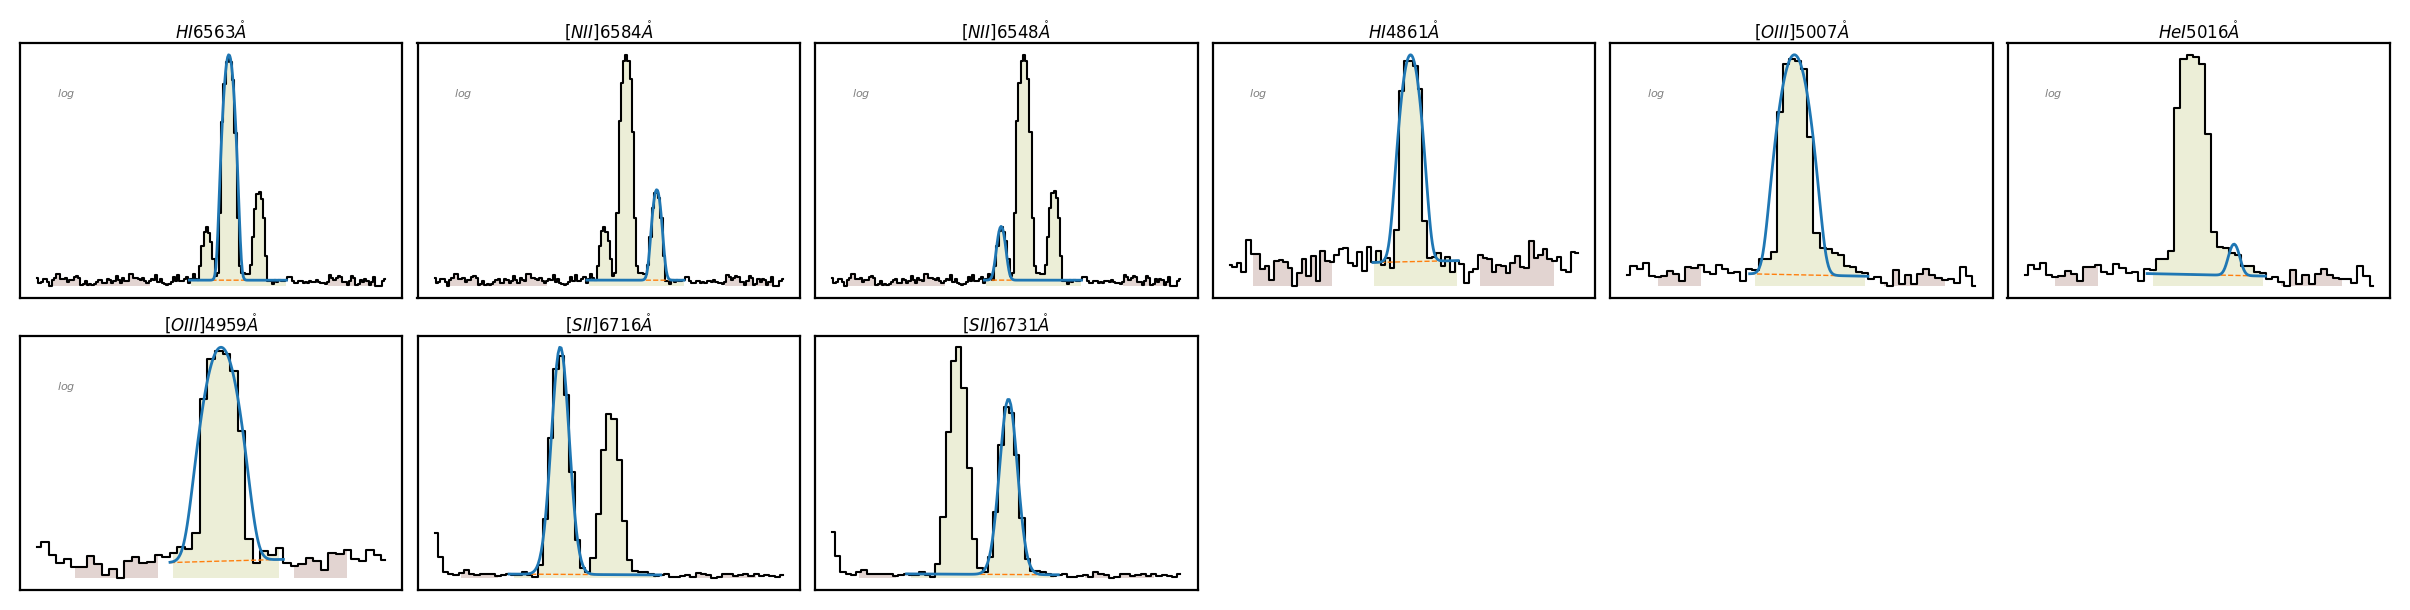

In [117]:
spec3.plot.grid()

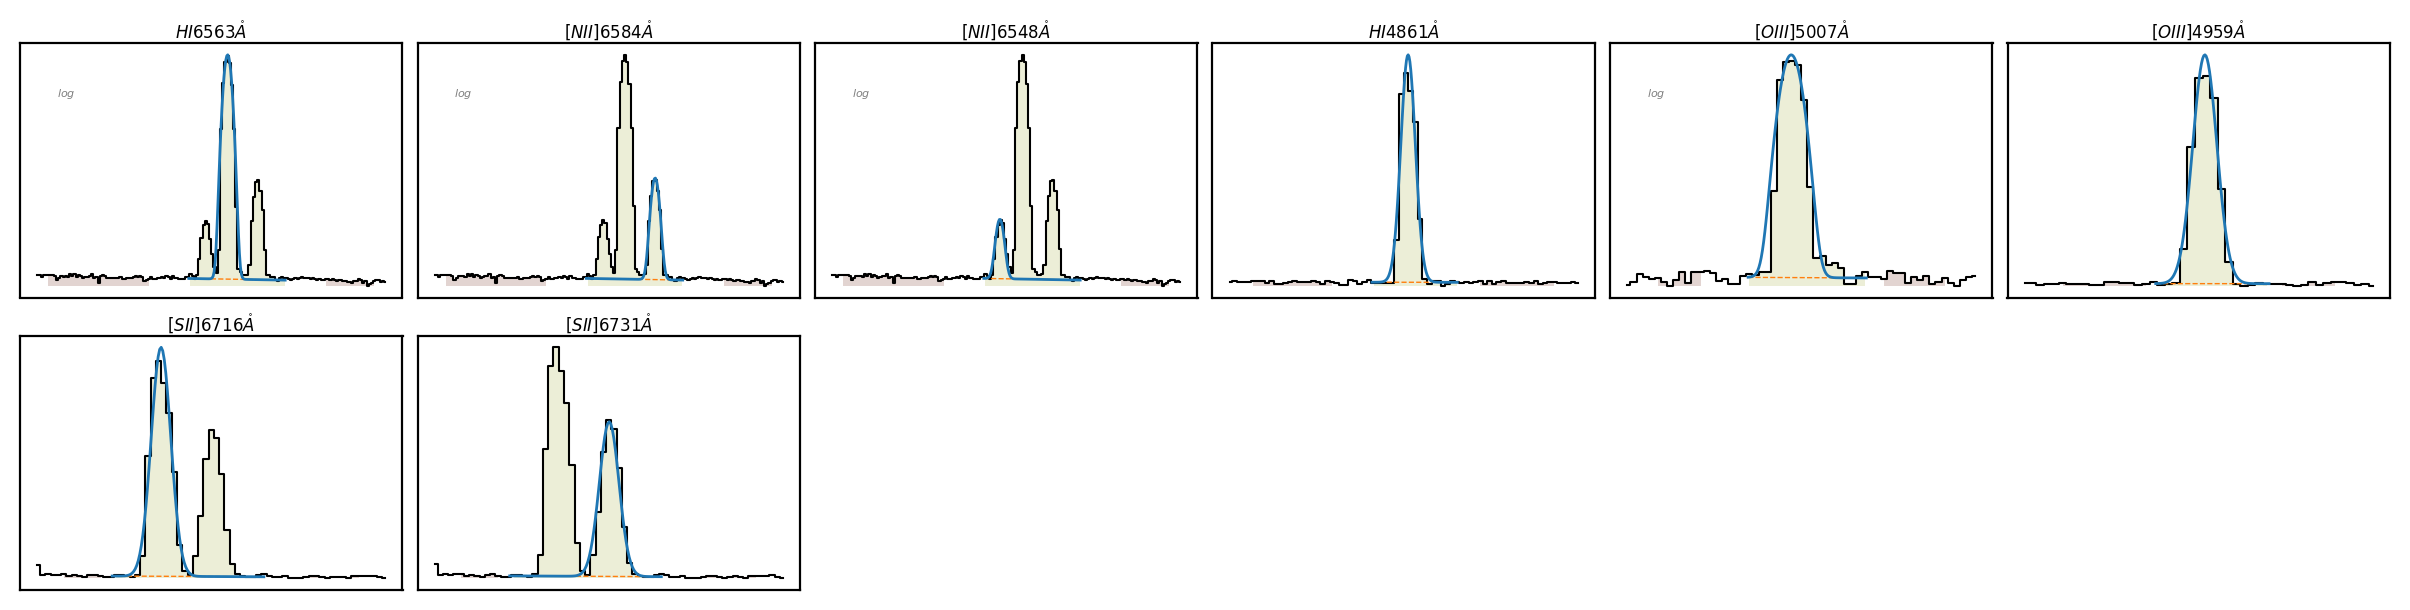

In [118]:
spec7.plot.grid()

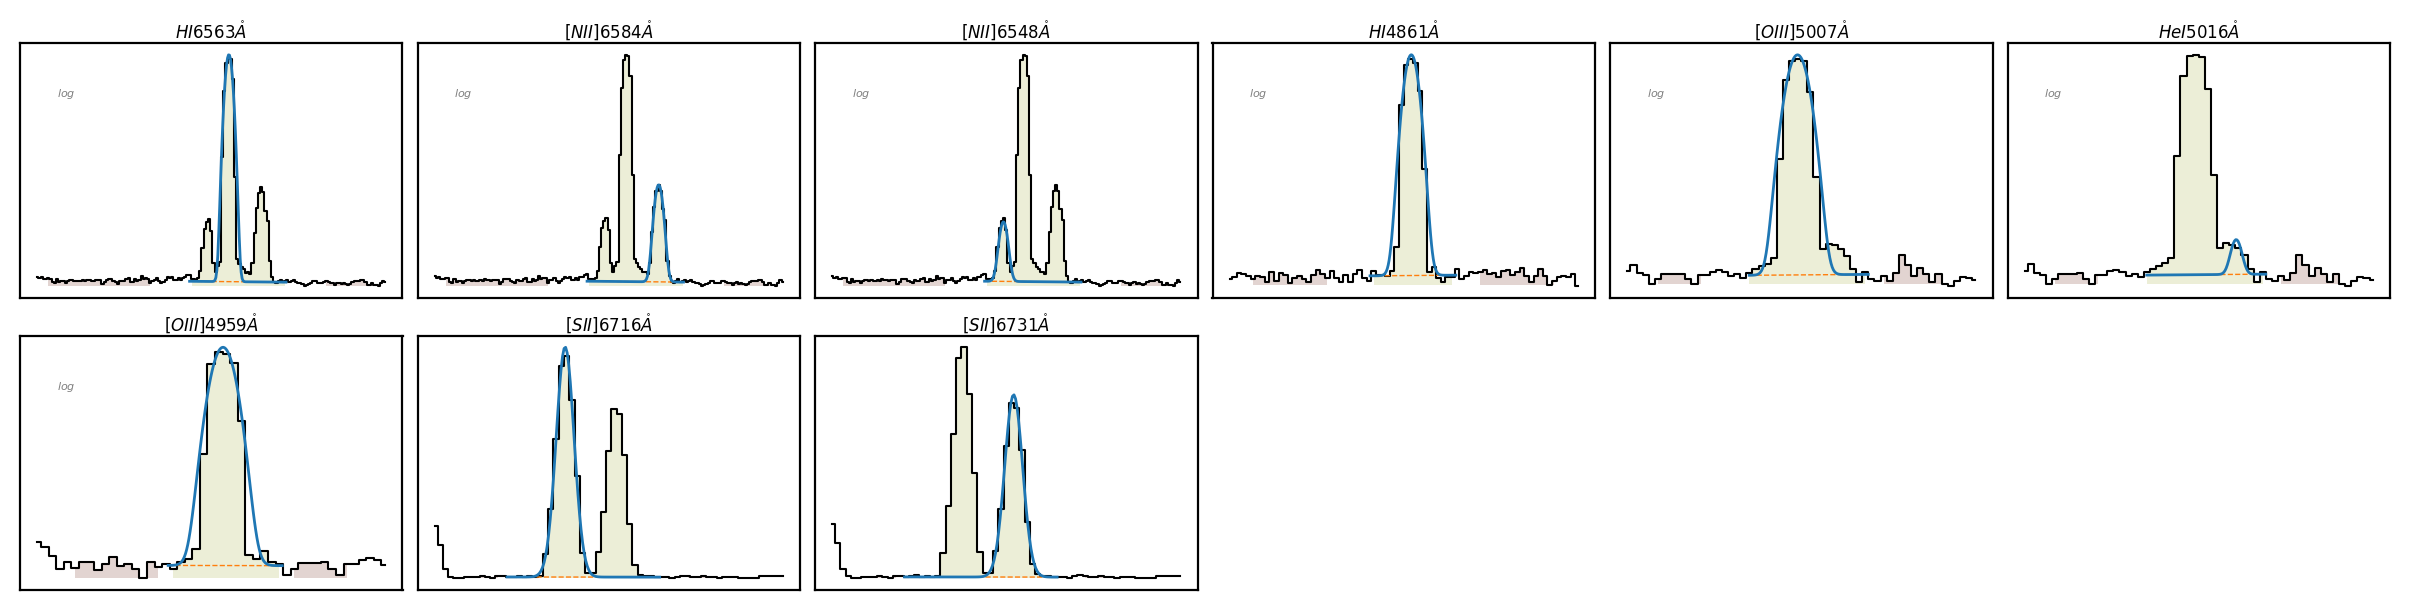

In [119]:
spec9.plot.grid()

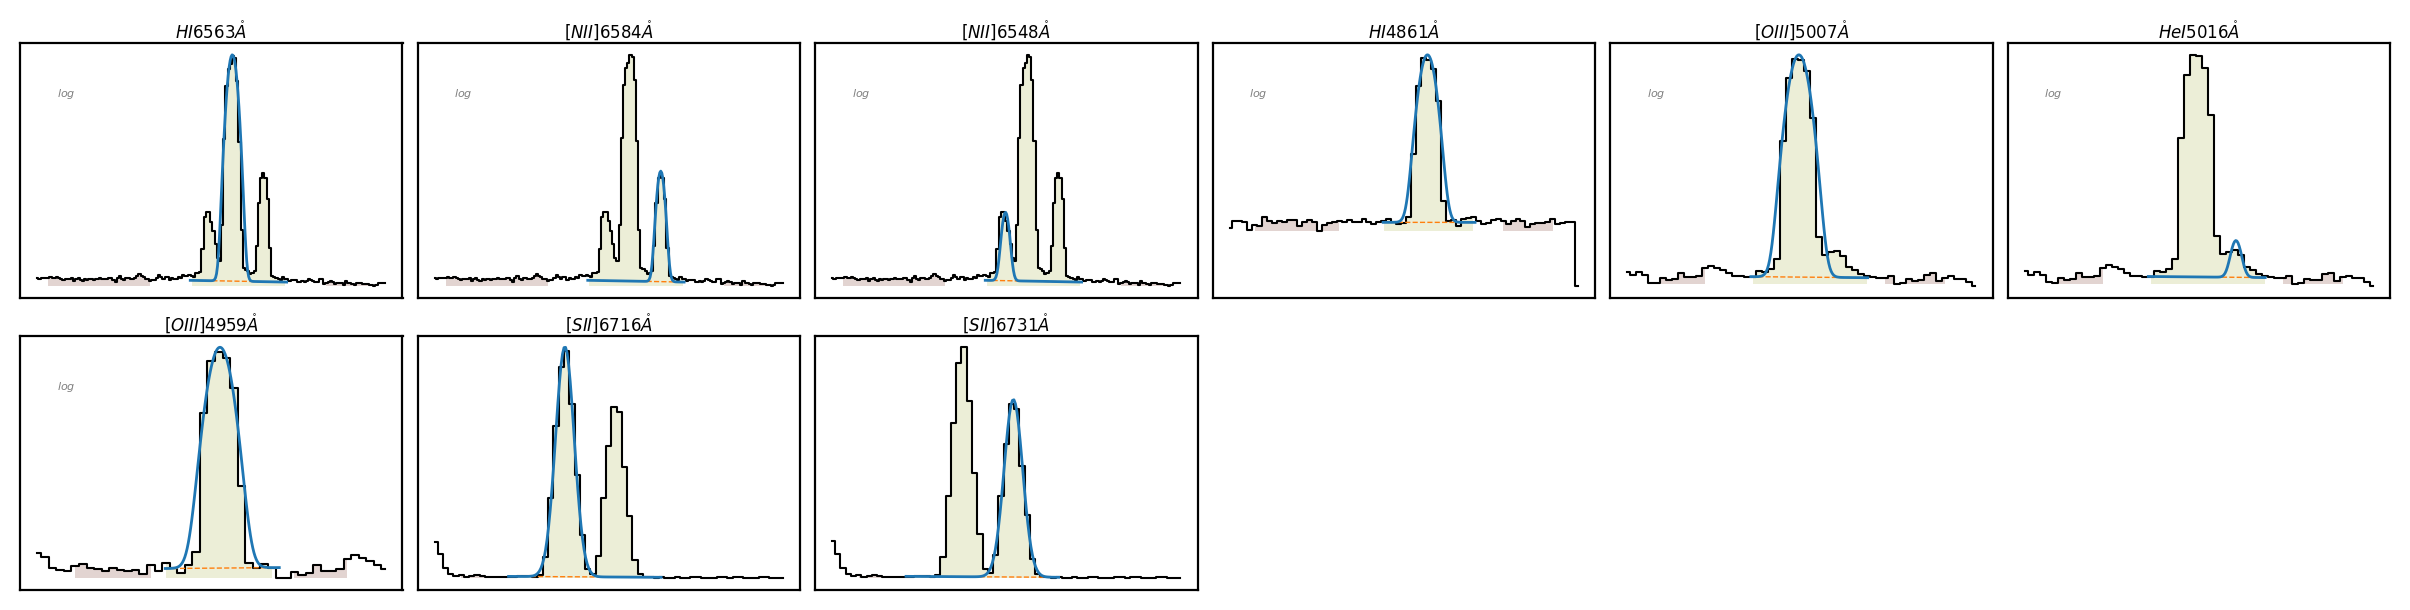

In [120]:
spec11.plot.grid()

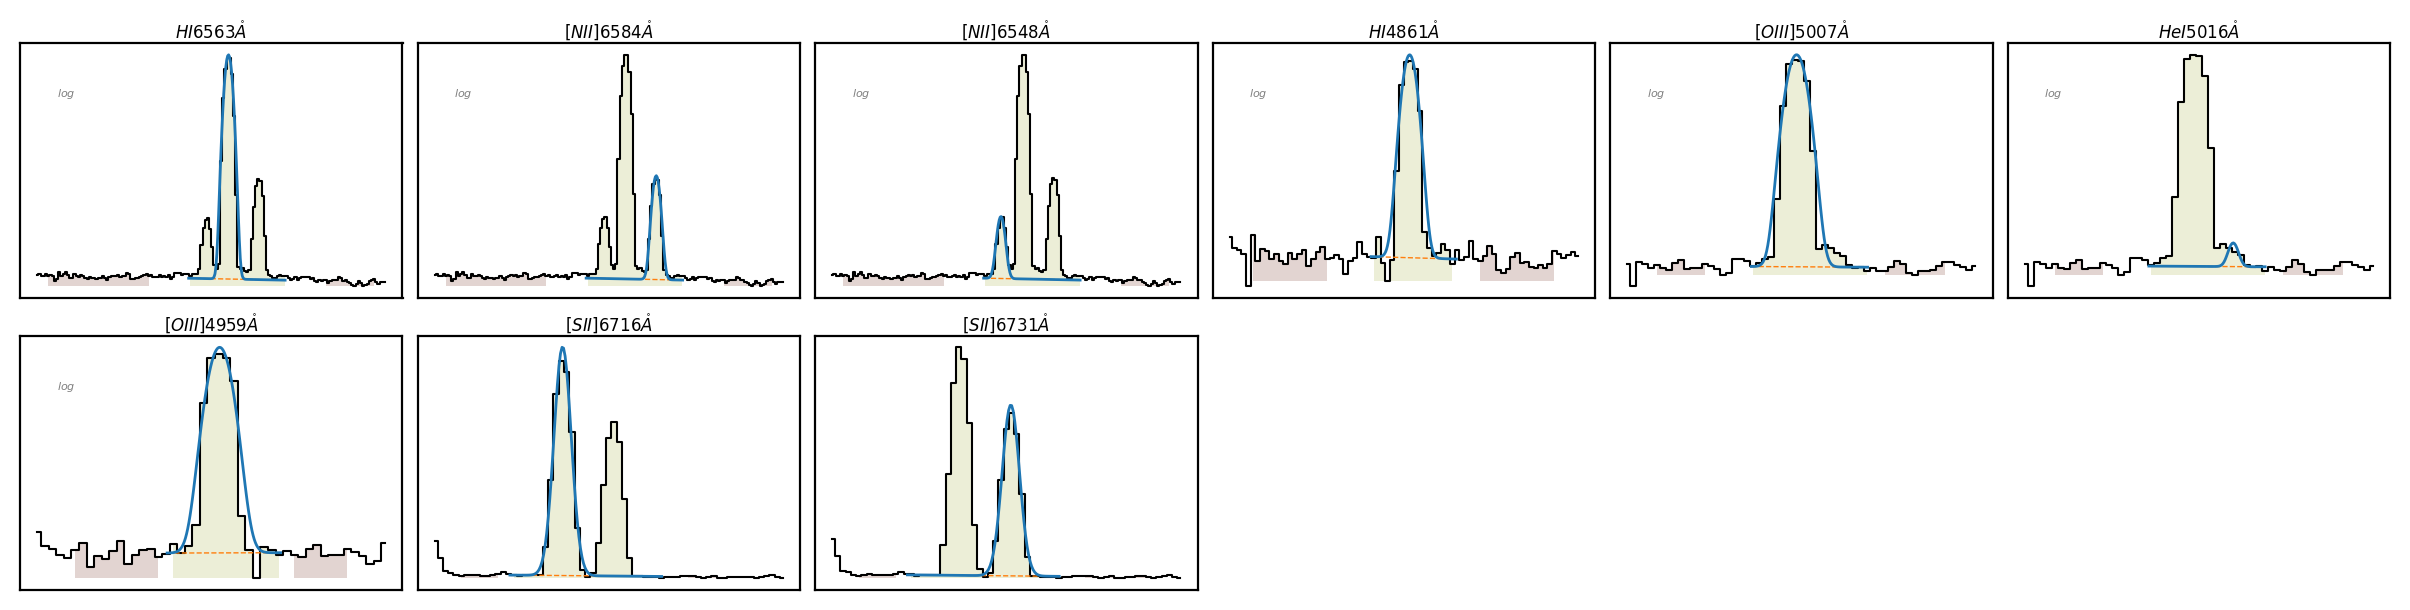

In [121]:
spec17.plot.grid()

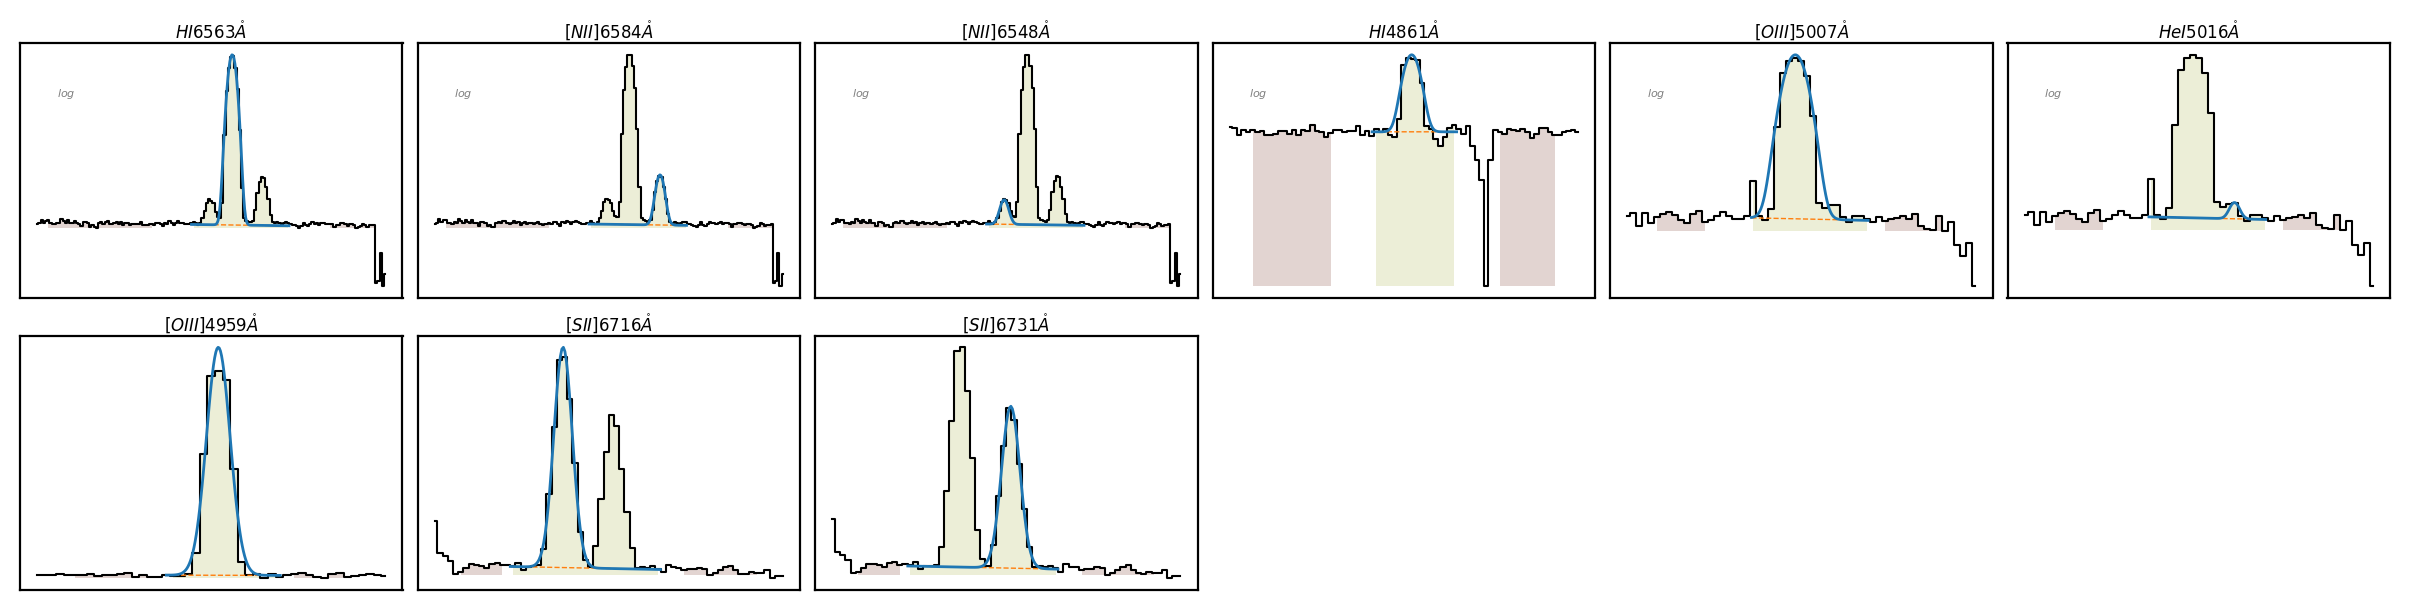

In [122]:
spec19.plot.grid()

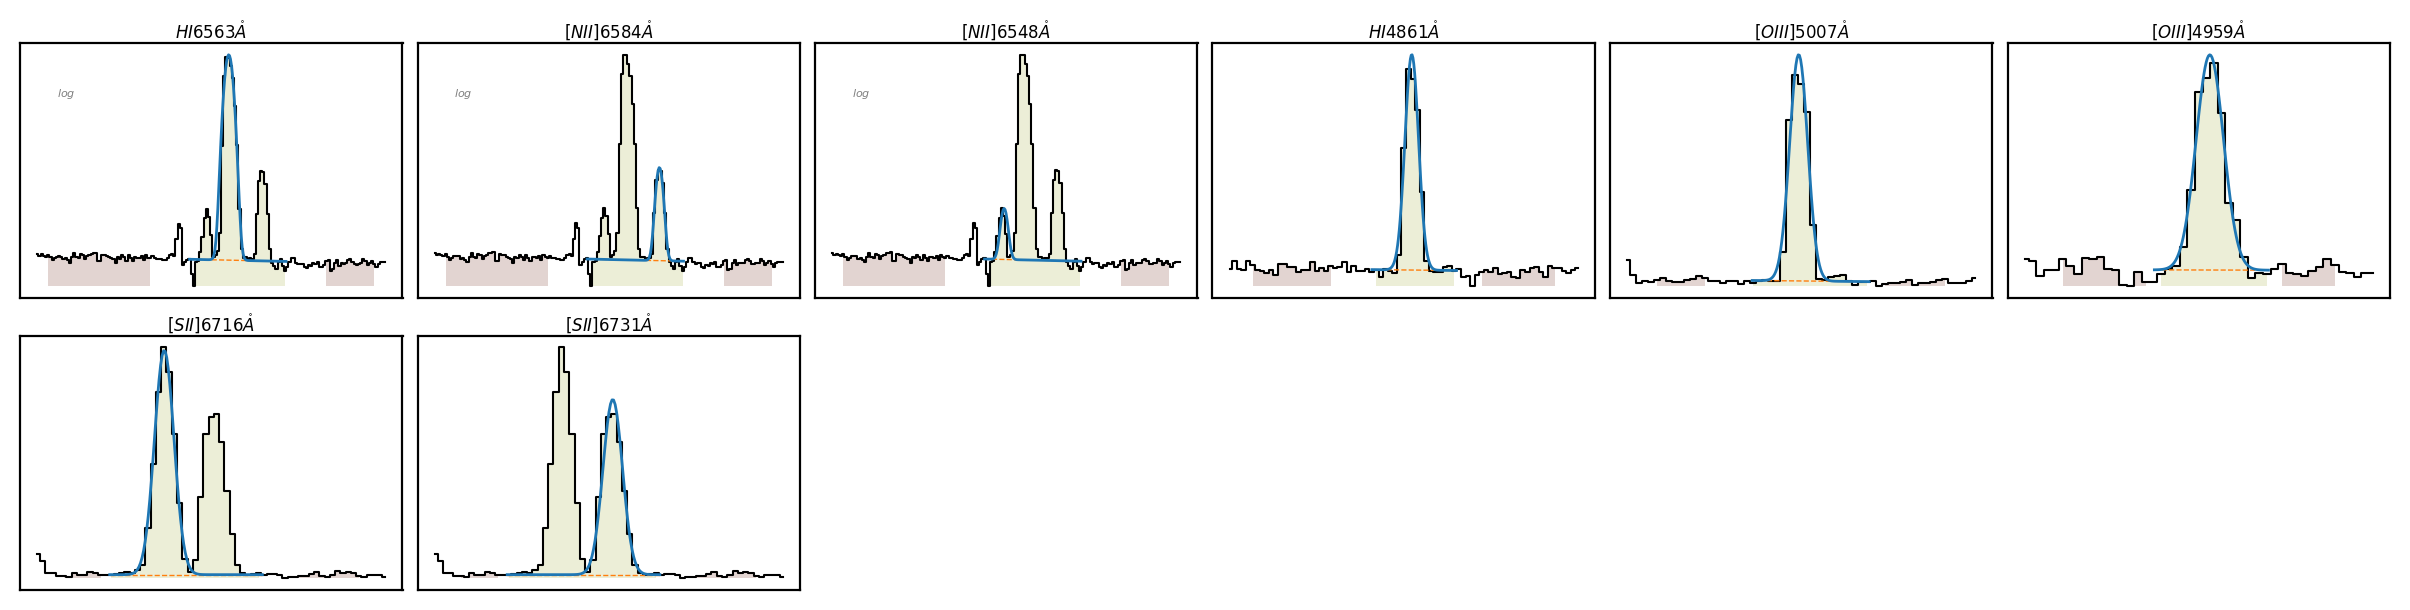

In [123]:
spec21.plot.grid()

In [128]:
spec1.frame
spec3.frame
spec7.frame
spec9.frame
spec11.frame
spec17.frame
spec19.frame
spec21.frame

wavelength  intg_flux  intg_flux_err  profile_flux  \
H1_6563A   6563.0000  36.353708       0.043081     33.777380   
N2_6584A   6584.0000  36.353708       0.043081      2.522022   
N2_6548A   6548.0000  36.353708       0.043081      0.852985   
H1_4861A   4861.2582   9.282696       0.177755      9.660407   
O3_5007A   5006.7664  16.022897       0.173300     16.518884   
O3_4959A   4958.8348   7.581723       0.260364      7.767641   
S2_6716A   6716.0000   3.975003       0.022005      2.247100   
S2_6731A   6731.0000   3.975003       0.022005      1.761160   

          profile_flux_err         eqw    eqw_err particle  \
H1_6563A          0.813083  386.772134  21.704330       H1   
N2_6584A          0.647046   28.878732   7.552322       N2   
N2_6548A          0.227850    9.767209   2.655591       N2   
H1_4861A          0.334590   38.803546   4.525466       H1   
O3_5007A          0.733071   70.634710   8.050963       O3   
O3_4959A          0.363920   31.822811   6.086588       O3   
S2_6716A          0.060033   29.061345   1.292942       S2   
S2_6731A          0.051440   22.776769   1.048410       S2   

                       latex_label                 group_label  ...  \
H1_6563A      $HI6563\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
N2_6584A   $[NII]6584\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
N2_6548A   $[NII]6548\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
H1_4861A      $HI4861\mathring{A}$                        none  ...   
O3_5007A  $[OIII]5007\mathring{A}$                        none  ...   
O3_4959A  $[OIII]4959\mathring{A}$                        none  ...   
S2_6716A   $[SII]6716\mathring{A}$           S2_6716A+S2_6731A  ...   
S2_6731A   $[SII]6731\mathring{A}$           S2_6716A+S2_6731A  ...   

                v_10        v_90         v_95         v_99        chisqr  \
H1_6563A -110.700218  280.611616  1002.537695  1174.698999  68745.649545   
N2_6584A -110.700218  280.611616  1002.537695  1174.698999  68745.649545   
N2_6548A -110.700218  280.611616  1002.537695  1174.698999  68745.649545   
H1_4861A         NaN         NaN          NaN          NaN    198.038874   
O3_5007A         NaN         NaN          NaN          NaN    866.938683   
O3_4959A         NaN         NaN          NaN          NaN     45.796454   
S2_6716A -130.071074  705.336214   764.480888   852.333885    664.537712   
S2_6731A -130.071074  705.336214   764.480888   852.333885    664.537712   

              redchi         aic         bic  observations  comments  
H1_6563A  613.800442  763.363125  779.987233            no        no  
N2_6584A  613.800442  763.363125  779.987233            no        no  
N2_6548A  613.800442  763.363125  779.987233            no        no  
H1_4861A    3.736583   76.734253   82.810308            no        no  
O3_5007A   21.673467  135.162030  140.445630            no        no  
O3_4959A    1.308470   13.091579   18.004338            no        no  
S2_6716A   13.290754  143.545809  151.501746            no        no  
S2_6731A   13.290754  143.545809  151.501746            no        no  

[8 rows x 73 columns]

In [130]:
spec1.save_frame('slit1_measurement_emission_lines.pdf')

-- PDF compilation failure


In [129]:
spec1.save_frame('slit1_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec3.save_frame('slit3_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec7.save_frame('slit7_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec9.save_frame('slit9_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec11.save_frame('slit11_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec17.save_frame('slit17_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec19.save_frame('slit19_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])
spec21.save_frame('slit21_measurement_emission_lines.pdf', param_list=['intg_flux', 'intg_flux_err', 'profile_flux', 'profile_flux_err','eqw','eqw_err'])

-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure
-- PDF compilation failure


In [126]:
spec1.frame

wavelength   intg_flux  intg_flux_err  profile_flux  \
H1_6563A    6563.0000  286.577593       0.031649    280.059840   
N2_6584A    6584.0000  286.577593       0.031649      7.812785   
N2_6548A    6548.0000  286.577593       0.031649      2.585814   
H1_4861A    4861.2582   85.879400       0.108506     88.574233   
O3_5007A    5006.7664  476.658926       0.106775    491.905823   
He1_5016A   5016.0000  476.658926       0.106775      1.879971   
O3_4959A    4958.8348  156.668417       0.095955    163.006250   
S2_6716A    6716.0000   12.106792       0.022743      6.988295   
S2_6731A    6731.0000   12.106792       0.022743      5.368710   

           profile_flux_err          eqw    eqw_err particle  \
H1_6563A       2.040106e+00  1962.446745  47.789683       H1   
N2_6584A       1.964830e+00    54.746065  13.826686       N2   
N2_6548A       7.002252e-01    18.119419   4.924678       N2   
H1_4861A       2.421022e+00   280.625008  17.031763       H1   
O3_5007A       1.876549e+01  1544.683805  99.610602       O3   
He1_5016A      2.220446e-16     5.903490   0.306933      He1   
O3_4959A       6.685770e+00   505.061976  32.502891       O3   
S2_6716A       1.071634e-01    52.323004   1.372802       S2   
S2_6731A       9.320162e-02    40.196790   1.104210       S2   

                        latex_label                 group_label  ...  \
H1_6563A       $HI6563\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
N2_6584A    $[NII]6584\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
N2_6548A    $[NII]6548\mathring{A}$  H1_6563A+N2_6584A+N2_6548A  ...   
H1_4861A       $HI4861\mathring{A}$                        none  ...   
O3_5007A   $[OIII]5007\mathring{A}$          O3_5007A+He1_5016A  ...   
He1_5016A     $HeI5016\mathring{A}$          O3_5007A+He1_5016A  ...   
O3_4959A   $[OIII]4959\mathring{A}$                        none  ...   
S2_6716A    $[SII]6716\mathring{A}$           S2_6716A+S2_6731A  ...   
S2_6731A    $[SII]6731\mathring{A}$           S2_6716A+S2_6731A  ...   

                 v_10        v_90        v_95        v_99        chisqr  \
H1_6563A  -197.935884  105.795674  156.217187  917.205604  9.515287e+05   
N2_6584A  -197.935884  105.795674  156.217187  917.205604  9.515287e+05   
N2_6548A  -197.935884  105.795674  156.217187  917.205604  9.515287e+05   
H1_4861A  -156.490961  179.581239  228.060656  271.611324  2.630883e+04   
O3_5007A  -199.368045  129.352792  160.175553  242.907141  1.128513e+06   
He1_5016A -199.368045  129.352792  160.175553  242.907141  1.128513e+06   
O3_4959A          NaN         NaN         NaN         NaN  1.482416e+05   
S2_6716A  -111.625691  718.377595  767.908016  842.287052  2.169261e+03   
S2_6731A  -111.625691  718.377595  767.908016  842.287052  2.169261e+03   

                 redchi          aic          bic  observations  comments  
H1_6563A    8572.330272  1065.427185  1082.000228            no        no  
N2_6584A    8572.330272  1065.427185  1082.000228            no        no  
N2_6548A    8572.330272  1065.427185  1082.000228            no        no  
H1_4861A     505.939016   345.367967   351.389967            no        no  
O3_5007A   29697.697884   436.347137   443.297815            no        no  
He1_5016A  29697.697884   436.347137   443.297815            no        no  
O3_4959A    4235.473600   320.222469   325.135227            no        no  
S2_6716A      42.534535   210.114482   218.143815            no        no  
S2_6731A      42.534535   210.114482   218.143815            no        no  

[9 rows x 73 columns]

In [125]:
spec1.save_frame('slit1_measurement_emission_lines.pdf')

-- PDF compilation failure


In [ ]:
spec1.save_frame('slit1_measurement_emission_lines.txt')
spec3.save_frame('slit3_measurement_emission_lines.txt')
spec7.save_frame('slit7_measurement_emission_lines.txt')
spec9.save_frame('slit9_measurement_emission_lines.txt')
spec11.save_frame('slit11_measurement_emission_lines.txt')
spec17.save_frame('slit17_measurement_emission_lines.txt')
spec19.save_frame('slit19_measurement_emission_lines.txt')
spec21.save_frame('slit21_measurement_emission_lines.txt')